## Welcome to the deep learning tutorial 👋!

The **goals** of the tutorial are to

1. Learn about the building blocks of PyTorch, from layer creation to regularisation and model training.
2. Train feed-forward neural networks on traditional and computer vision tasks.
3. Explore how more advanced network structures can be leveraged to perform time series analysis, and how convolutional layers impact the performance of neural networks on computer vision tasks.
4. Load pre-trained language models from huggingface and use transfer learning to showcase NLP applications.

#### Documentation

- [PyTorch](https://pytorch.org)
- [huggingface](https://huggingface.co)

#### Repos

- [Voight, D. (2022) - Deep Learning with pyTorch Step-by-Step](https://github.com/dvgodoy/PyTorchStepByStep)

#### Books

- [Goodfellow et al (2016) - The Deep Learning Book](https://www.deeplearningbook.org)


In [131]:
import random
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

from toolz import pipe
from typing import Dict, Sequence
from PIL import Image

from dap_taltech.utils.data_getters import DataGetter
from dap_taltech import logger

In [65]:
alt.data_transformers.enable('default', max_rows=None)
getter = DataGetter(local=True)

2023-08-15 11:20:20,070 - TalTech HackWeek 2023 - INFO - Loading data from open dap-taltech s3 bucket. (1520674024.py:61)


### PyTorch 🚀

In the universe of deep learning, PyTorch shines like a bright star. An open-source library originally developed by the Facebook AI Research lab, PyTorch provides a platform for all your computation needs, with a particular focus on deep neural networks.

At the core of PyTorch, we find tensors - multi-dimensional arrays similar to NumPy ndarrays but with superpowers. These tensors can be used on a GPU, enabling a significant speedup in computations, a crucial aspect for deep learning tasks which has spurred the surge in deep learning capability in recent times.

In Pytorch, tensors can be declared simply in one of several ways:

<img src="https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg" width="800" height="400">


What sets PyTorch apart is its dynamic computation graph, offering flexibility in building complex architectural models. It also provides excellent support for gradient-based optimisation through automatic differentiation, a backbone of backpropagation in neural networks.

Lastly, it's worth mentioning PyTorch's rich ecosystem that includes TorchText, TorchVision, and TorchAudio for text, image, and audio processing, respectively. Together, they make PyTorch a versatile tool, suited to solve a broad range of AI tasks.

In this section we're going to first introduce and then build a standard PyTorch workflow, which largely looks as follows:

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

So strap in and get ready to launch into the deep learning cosmos with PyTorch! 🚀

In [4]:
import torch

# Check PyTorch version
torch.__version__

'2.0.1'

With the code below, we are configuring our computing setup to be device agnostic. This means, if we are lucky enough to have a GPU, we will leverage its processing power and adequacy to handle tensors. In its absence, we shall have to rely on the good old CPU.

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


#### A primer on Tensors

Tensors form the essential building blocks in the realm of deep learning libraries, including PyTorch. A tensor, in the simplest terms, is a generalization of vectors and matrices to potentially higher dimensions, with the ability to represent n-dimensional arrays of data. 

In PyTorch, these tensors behave similarly to the ndarray objects in NumPy, but with an added advantage of being usable on a GPU, thereby facilitating faster computational operations. Further, these tensors also keep track of the computational graph and gradients, acting as key players in the automatic differentiation system of PyTorch, which is central to training neural networks. 

So, understanding tensors essentially becomes the stepping stone into the world of deep learning. Let's do just that!

In [6]:
# An empty tensor
tensor = torch.empty(6,4, dtype=torch.float)
print(tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


Note the elements are not necessarily zero; rather, they are the values in RAM / VRAM memory at the location where the tensor was created. The reason for this is efficiency: if you know you will be writing to all the elements of the tensor, then there is no need to spend time initialising them, so torch.empty() doesn't.

We can always retrieve the shape of the tensor x, providing the dimensions of the tensor in a convenient tuple format.

In [7]:
tensor.size()

torch.Size([6, 4])

In PyTorch, you can conveniently convert tensors into numpy arrays, enabling easy integration with existing Python workflows.

In [8]:
tensor.numpy()

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

The reverse is also true: you can use a numpy array and transform it to a tensor.

In [9]:
array = np.array([[1,5],[2,3]])
torch.from_numpy(array)

tensor([[1, 5],
        [2, 3]])

#### Tensor Operations 🛠️

Creating tensors and understanding their basic properties is important, but the real magic of tensors comes into play when we start performing operations on them.

##### Random numbers similar to numpy 🎲

We can easily create a tensor filled with random numbers from a uniform distribution on the interval [0, 1), similar to how we do it in numpy.

In [10]:
tensor = torch.rand(6, 4)
print(tensor)

tensor([[0.0394, 0.7338, 0.8818, 0.6174],
        [0.5069, 0.7238, 0.8324, 0.8748],
        [0.9505, 0.1157, 0.7017, 0.2366],
        [0.2718, 0.0605, 0.9058, 0.5635],
        [0.5863, 0.6447, 0.8523, 0.1810],
        [0.6644, 0.3201, 0.8508, 0.3925]])


##### Construct a matrix filled with zeros and of dtype long 🎯
We can also create tensors filled with zeros (or any other number), specifying their type at creation time.

In [11]:
tensor = torch.zeros(6, 4, dtype=torch.long)
print(tensor)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])


In [12]:
tensor = torch.ones(2, 2, dtype=torch.long)
print(tensor)

tensor([[1, 1],
        [1, 1]])


##### Construct a tensor directly from data 📚
Directly constructing a tensor from a list of numbers is also an option. Remember, the tensor will copy the data, not reference it.

In [13]:
tensor = torch.tensor([3, 2.5])
print(tensor)

tensor([3.0000, 2.5000])


##### Create tensor based on existing tensor 🔄
In some cases, you might want to create a tensor that has the same properties as another tensor (same dtype and same device), but filled with different data. For this, PyTorch provides the new_ones and new_zeros methods.

In [14]:
tensor = tensor.new_ones(3, 3, dtype=torch.double)
print(tensor)
print(tensor.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
torch.Size([3, 3])


In [15]:
tensor = torch.randn_like(tensor, dtype=torch.float)
print(tensor) 
print(tensor.size())


tensor([[ 0.1847,  0.0489,  0.0772],
        [-0.1787,  2.7371, -0.5401],
        [-1.2963, -1.9141, -0.7464]])
torch.Size([3, 3])


#### Basic Tensor Operation 🧮
Performing arithmetic operations on tensors is easy and intuitive. Under the hood, these operations are highly optimised and can run in parallel on a GPU. This makes PyTorch a powerful tool for numerical computations, similar to numpy but with powerful GPU or other hardware acceleration.

<img src="https://devblogs.nvidia.com/wp-content/uploads/2018/05/tesnor_core_diagram.png" width="800" height="400">

We have a variety of basic operations such as addition(torch.add()), subtraction(torch.sub()), division(torch.div()), and multiplication(torch.mul()) that can be performed on tensors. Let's dive in!

Addition

In [16]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y) # Standard Python addition
print(torch.add(x, y)) # PyTorch method

tensor([[1.5285, 1.8044, 1.0730],
        [0.7030, 1.1019, 1.3449],
        [1.0542, 0.9257, 1.3359],
        [0.6120, 1.2910, 0.8790],
        [1.6331, 1.1324, 0.7862]])
tensor([[1.5285, 1.8044, 1.0730],
        [0.7030, 1.1019, 1.3449],
        [1.0542, 0.9257, 1.3359],
        [0.6120, 1.2910, 0.8790],
        [1.6331, 1.1324, 0.7862]])


Subtraction

In [17]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x - y) # Standard Python subtraction
print(torch.sub(x, y)) # PyTorch method

tensor([[-0.0794, -0.3280, -0.1470],
        [ 0.7862,  0.3339,  0.9267],
        [ 0.0422, -0.4269,  0.5237],
        [-0.6518,  0.2045, -0.3363],
        [ 0.4012,  0.2376, -0.3770]])
tensor([[-0.0794, -0.3280, -0.1470],
        [ 0.7862,  0.3339,  0.9267],
        [ 0.0422, -0.4269,  0.5237],
        [-0.6518,  0.2045, -0.3363],
        [ 0.4012,  0.2376, -0.3770]])


Divison

In [18]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x / y) # Standard Python division
print(torch.div(x, y)) # PyTorch method

tensor([[0.9331, 0.9181, 0.9860],
        [0.2021, 2.4187, 3.4015],
        [1.4689, 3.9876, 6.5384],
        [3.3144, 0.3502, 0.3677],
        [1.2884, 1.0060, 0.2906]])
tensor([[0.9331, 0.9181, 0.9860],
        [0.2021, 2.4187, 3.4015],
        [1.4689, 3.9876, 6.5384],
        [3.3144, 0.3502, 0.3677],
        [1.2884, 1.0060, 0.2906]])


Multiplication

In [19]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x * y) # Standard Python multiplication
print(torch.mul(x, y)) # PyTorch method

tensor([[0.7903, 0.3613, 0.1084],
        [0.0530, 0.8408, 0.0649],
        [0.6108, 0.4286, 0.7936],
        [0.0965, 0.1637, 0.1108],
        [0.8257, 0.5903, 0.2118]])
tensor([[0.7903, 0.3613, 0.1084],
        [0.0530, 0.8408, 0.0649],
        [0.6108, 0.4286, 0.7936],
        [0.0965, 0.1637, 0.1108],
        [0.8257, 0.5903, 0.2118]])


PyTorch also provides an in-place addition method. This means the addition operation is done on the tensor and the result is stored in the same tensor, without creating a new one. Remember that in PyTorch, every method that ends with an underscore performs an in-place operation.

In [20]:
y.add_(x)  # adds x to y
print(y)

tensor([[1.7787, 1.2319, 0.7048],
        [0.5942, 1.8370, 0.5112],
        [1.5929, 1.3986, 1.7902],
        [0.8384, 0.8697, 0.6917],
        [1.8183, 1.5782, 1.1115]])


PyTorch tensors also support standard numpy-like indexing with all the bells and whistles!

In [21]:
print(x[:, 1])  # Prints the second column of tensor x

tensor([0.4814, 0.8656, 0.9452, 0.2754, 0.6090])


##### Resizing Tensors
PyTorch also provides methods to reshape tensors, similar to numpy's reshape function. The view method in PyTorch can be used to reshape a tensor.

In [22]:
x = torch.randn(6, 6)
print(x)

tensor([[ 0.3094,  2.1419, -0.6564,  0.4204, -2.1637,  0.8407],
        [ 0.6767, -0.4531,  0.2901, -0.6200,  0.4739, -0.1835],
        [-0.9678,  0.0858,  0.1409,  1.0203,  1.0131,  0.2175],
        [-0.2394,  0.5541, -0.7380,  0.8417, -1.4763, -0.7289],
        [ 0.3594, -1.2250, -1.4660, -0.8725,  1.4232, -0.9364],
        [-0.4861, -1.3297,  1.0466,  0.7311, -0.7061,  1.0609]])


In [23]:
y = x.view(36)
print(y)

tensor([ 0.3094,  2.1419, -0.6564,  0.4204, -2.1637,  0.8407,  0.6767, -0.4531,
         0.2901, -0.6200,  0.4739, -0.1835, -0.9678,  0.0858,  0.1409,  1.0203,
         1.0131,  0.2175, -0.2394,  0.5541, -0.7380,  0.8417, -1.4763, -0.7289,
         0.3594, -1.2250, -1.4660, -0.8725,  1.4232, -0.9364, -0.4861, -1.3297,
         1.0466,  0.7311, -0.7061,  1.0609])


In [24]:
z = x.view(-1, 4)  # the size -1 is inferred from other dimensions
print(z)

tensor([[ 0.3094,  2.1419, -0.6564,  0.4204],
        [-2.1637,  0.8407,  0.6767, -0.4531],
        [ 0.2901, -0.6200,  0.4739, -0.1835],
        [-0.9678,  0.0858,  0.1409,  1.0203],
        [ 1.0131,  0.2175, -0.2394,  0.5541],
        [-0.7380,  0.8417, -1.4763, -0.7289],
        [ 0.3594, -1.2250, -1.4660, -0.8725],
        [ 1.4232, -0.9364, -0.4861, -1.3297],
        [ 1.0466,  0.7311, -0.7061,  1.0609]])


Well done! You have learned how to perform basic operations with PyTorch tensors! The power of PyTorch, however, really shines when building complex neural network models, as we'll see in a few sections. Keep going!

#### Tensors and the ability to derivate 🔥

One of the pivotal elements setting PyTorch apart from other deep learning frameworks is its dynamic computational graph paradigm, enabling on-the-go generation and modification of models. It's been made possible primarily due to the torch.Tensor object.

![](https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/dynamic_graph.gif)

In essence, a torch.Tensor wraps the functionality previously catered to by torch.autograd.Variable. In the older versions of PyTorch, Variable used to be the central class of the package and was pivotal for automatic differentiation. However, with newer versions of PyTorch, Variable has been deprecated, and now the functionality is incorporated into torch.Tensor itself. It supports almost all APIs defined by torch.Tensor and additionally, provides a backward() method that allows easy calculation of gradients.

Consider the loss function for a model parameter 'x'. By storing the computed value by the loss function in a tensor 'loss', we can call loss.backward() to compute the gradients ∂loss/∂x for all trainable parameters. PyTorch will store the gradient results back in the corresponding tensor 'x'.

Let's delve into a simple demonstration 

In [25]:
tensor = torch.tensor([[1.9, 2.3, 3.1], [4.1, 5.7, 6.3]], dtype=torch.float32)
print(tensor)

tensor([[1.9000, 2.3000, 3.1000],
        [4.1000, 5.7000, 6.3000]])


Next we specify that we want to compute gradients

In [26]:
tensor.requires_grad_(True)

tensor([[1.9000, 2.3000, 3.1000],
        [4.1000, 5.7000, 6.3000]], requires_grad=True)

Let's square our tensor, ie. let's assume the following functional form.

$$
f(x) = x^2
$$

where x is our (2, 3) dimensional tensor.

In [27]:
out = torch.mean(tensor*tensor)
print(out)

tensor(17.9167, grad_fn=<MeanBackward0>)


And let's now backpropagate.

In [28]:
out.backward()

The gradients are now stored in .grad

In [29]:
print(tensor.grad)

tensor([[0.6333, 0.7667, 1.0333],
        [1.3667, 1.9000, 2.1000]])


Note that this is not the tensor itself.

In [30]:
print(tensor)

tensor([[1.9000, 2.3000, 3.1000],
        [4.1000, 5.7000, 6.3000]], requires_grad=True)


#### Starting Small 🔧: Implementing Logistic Regressions in PyTorch

Now that we've acquainted ourselves with tensors and their ability to be automatically differentiated, it's time to apply this knowledge in the context of a basic yet highly effective machine learning model - Logistic Regression. 

Note that, from now onwards, we will be using problems in the traditional Machine Learning approach:

1. Turn your data, whatever it is, into numbers - create a numeric representation.
2. Select or build a model to learn the representation as best as possible.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png" width="800" height="400">


As seen in the slides, a logistic regression is a simple binary classification algorithm that serves as a great entry point to understanding more complex neural networks. In essence, it could be considered as a one-layer neural network with a sigmoid activation function. The sigmoid function transforms the output to fall within the range of 0 to 1, which suits binary classification problems.

In the following steps, we will use PyTorch to set up our data and parameters, perform the necessary computations using the sigmoid activation function, and optimise the model through minimising the binary cross-entropy loss.

We start by creating a synthetic dataset to demonstrate logistic regression. We use PyTorch's built-in functions to create a tensor of `n_samples` observations, each with `input_size` features. We then assign a binary label to each observation based on the sum of its features. Specifically, we classify an observation as `1` if the sum of its features plus some noise is greater than `0`, and `0` otherwise.


In [31]:
# Create some data
n_samples = 100
input_size = 3

x = torch.randn(n_samples, input_size)
y = torch.where(x[:, 0] + x[:, 1] + x[:, 2] + 0.5 * torch.randn(n_samples) > 0, 1., 0.)

In [32]:
print(x)

tensor([[ 7.9890e-01,  2.5159e+00, -3.3105e-01],
        [-1.0548e+00,  1.9491e+00, -1.1281e+00],
        [ 1.2757e+00,  3.2030e-01,  1.8329e+00],
        [-1.6774e+00, -6.4081e-01,  1.6604e+00],
        [-1.3183e+00, -1.8897e-01,  2.5609e-01],
        [-2.3492e-01,  2.4452e-03, -2.8774e-01],
        [-1.0506e+00, -4.0070e-01,  9.2627e-02],
        [ 4.3842e-01,  6.6351e-01,  7.1720e-01],
        [ 1.4705e+00, -1.0548e+00,  1.0991e-01],
        [ 1.0650e+00,  4.8992e-01,  8.4485e-01],
        [ 1.6650e+00,  7.2236e-01, -9.7407e-02],
        [ 3.3162e-01, -3.6758e-01, -2.9164e-01],
        [ 2.0594e+00,  7.5160e-01,  4.2734e-01],
        [ 2.4366e+00,  2.6443e-01, -7.0803e-02],
        [ 1.3283e+00, -3.2258e-01, -1.4808e-01],
        [ 4.2117e-01, -3.2883e-01,  9.3836e-01],
        [-9.1245e-01, -1.5635e-01, -1.5646e-02],
        [-3.6353e-01, -5.9899e-01, -1.2665e+00],
        [ 6.7148e-01,  8.6785e-01, -6.1875e-01],
        [ 3.2822e-01,  1.8003e+00, -2.2349e-01],
        [-3.7541e-02

In [33]:
print(y)

tensor([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 1., 0.])


For better understanding of our data, we can visualise it in a 3D scatter plot. Here, each axis corresponds to a feature, and the color of each point represents its class.

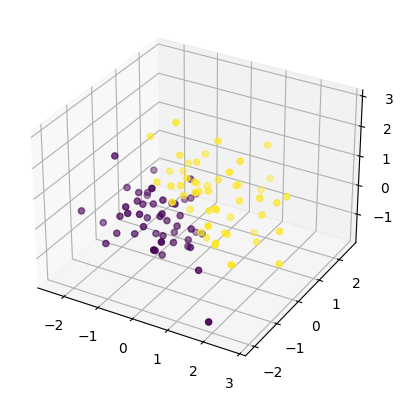

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
plt.show()

Now we define our model. We start by initialising the weights and bias. In logistic regression, the weights and bias form the parameters of the model that we need to learn. Each feature in our input data will be multiplied by a corresponding weight, and the bias term allows the model to fit the best hyperplane that separates the classes in the data.

<img src="https://media5.datahacker.rs/2021/01/44.jpg" width="600" height="300">


The weight tensor is initialised with zeros and has the same number of elements as the input features, and is set to requires_grad=True to enable computation of gradients which is essential for model training. The bias is a scalar, also initialised to zero and set to requires_grad=True.


In [35]:
weights = torch.zeros(input_size, 1, requires_grad=True)
print(weights, weights.shape)

tensor([[0.],
        [0.],
        [0.]], requires_grad=True) torch.Size([3, 1])


In [36]:
bias = torch.zeros(1, requires_grad=True)
print(bias, bias.shape)

tensor([0.], requires_grad=True) torch.Size([1])


These two tensors define the parameter space of our logistic regression model. Using these parameters, we will map our input data to a variable z that represents the log-odds of the positive class. The higher the value of z, the higher the predicted probability of the positive class.

Next, we define the `sigmoid` function. The sigmoid function maps any real value into another value between 0 and 1.

In [37]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

We calculate the logits (`z`) which is a linear transformation of the features. It's calculated by taking the matrix multiplication of our data (`x`) and the weights, and then adding the bias. We then apply the sigmoid function on the logits to get `y_hat`, the estimated probabilities for each class.

In [38]:
z = torch.matmul(x, weights) + bias

y_hat = sigmoid(z)

We can then compute the loss. The loss quantifies how well our predictions `y_hat` match the true values `y`. For logistic regression, we use Binary Cross Entropy (BCE) loss. 

In [39]:
loss = -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)).mean()
print(loss)

tensor(0.6931, grad_fn=<NegBackward0>)


Having made it to the end of the forward pass, we now initiate a backward pass (ie. we backpropagate) and update the weights in `x` given the gradients computed from the loss. 

In [40]:
loss.backward()

After backpropagating, we can print the computed gradients for the weights and bias. Recall that each element in `weights.grad` and `bias.grad` represents the partial derivative of the loss function with respect to the corresponding element in `weights` and `bias`.

In [41]:
print(weights.grad, bias.grad)

tensor([[ 5.5147e-05],
        [-6.2251e-05],
        [-7.1366e-04]]) tensor([-0.0100])


Next, we update the `weights` and `bias` tensors using gradient descent. However, we need to ensure that these operations do not create computation graph, i.e., the gradient should not be computed for these updates. To achieve this, we perform these operations inside the `torch.no_grad()` context manager, which temporarily disables the autograd mechanism. The learning rate, or speed at which we update our parameters, is set to `0.1`.

In [42]:
with torch.no_grad():
    weights -= 0.1 * weights.grad
    bias -= 0.1 * bias.grad

After updating the parameters, it is important to clear the old gradients. By default, PyTorch accumulates gradients, i.e., the next time we call `.backward()`, the new gradient values will be added to the existing gradient values, which will lead to incorrect results. We can reset the gradients back to zero by calling `.zero_()` method.

In [43]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

And that's an entire forward and backward pass!

Now, we will encapsulate the entire process of a forward and backward pass of logistic regression into a single Python class, `BinaryLogisticRegression`. The class includes the following methods:

- `__init__`: Constructor that initialises weights, bias, and learning rate. The weights and bias are set as tensors full of zeros.

- `forward`: Performs the forward pass and calculates the predicted output using the input data and parameters.

- `sigmoid`: Implements the sigmoid function to squash the output of the forward pass to a probability between 0 and 1.

- `loss`: Computes the binary cross entropy loss.

- `backward`: Calculates the gradients and updates the weights and bias using gradient descent.


In [44]:
class BinaryLogisticRegression:
    """A simple logistic regression model with binary cross-entropy loss.
    """    
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = torch.zeros(input_size, 1, requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True)
        self.learning_rate = learning_rate

    def forward(self, x):
        out = torch.matmul(x, self.weights) + self.bias
        return out

    def sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))

    def loss(self, y_pred, y_true):
        y_pred = self.sigmoid(y_pred)
        loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()
        return loss

    def backward(self, x, y_true):
        y_pred = self.forward(x)
        loss = self.loss(y_pred, y_true)
        loss.backward()
        with torch.no_grad():
            self.weights -= self.learning_rate * self.weights.grad
            self.bias -= self.learning_rate * self.bias.grad
            self.weights.grad.zero_()
            self.bias.grad.zero_()

We will now instantiate the `BinaryLogisticRegression` class and train our model for a certain number of epochs.

In [45]:
model = BinaryLogisticRegression(input_size=input_size, learning_rate=0.1)

 In each epoch, the model will perform a forward pass to compute the predicted labels and the loss, then perform a backward pass to compute the gradients and update the weights and bias. The loss for each epoch is printed to monitor the training progress.

In [46]:
# Train the model for some number of epochs
num_epochs = 100
for epoch in range(num_epochs):
    # Compute the predicted labels and the loss
    y_pred = model.forward(x)
    loss = model.loss(y_pred, y)

    # Compute the gradients and update the weights and bias
    model.backward(x, y)

    # Print the loss for this epoch
    print(f'Epoch {epoch + 1}/{num_epochs}: Loss = {loss.item()}')

Epoch 1/100: Loss = 0.6931473016738892
Epoch 2/100: Loss = 0.6931372284889221
Epoch 3/100: Loss = 0.6931278109550476
Epoch 4/100: Loss = 0.6931188702583313
Epoch 5/100: Loss = 0.6931102275848389
Epoch 6/100: Loss = 0.693102240562439
Epoch 7/100: Loss = 0.6930946111679077
Epoch 8/100: Loss = 0.6930872797966003
Epoch 9/100: Loss = 0.6930803656578064
Epoch 10/100: Loss = 0.6930737495422363
Epoch 11/100: Loss = 0.6930674910545349
Epoch 12/100: Loss = 0.6930615901947021
Epoch 13/100: Loss = 0.6930558681488037
Epoch 14/100: Loss = 0.6930504441261292
Epoch 15/100: Loss = 0.6930453777313232
Epoch 16/100: Loss = 0.6930404901504517
Epoch 17/100: Loss = 0.6930358409881592
Epoch 18/100: Loss = 0.6930314898490906
Epoch 19/100: Loss = 0.6930273175239563
Epoch 20/100: Loss = 0.6930233836174011
Epoch 21/100: Loss = 0.6930195093154907
Epoch 22/100: Loss = 0.693015992641449
Epoch 23/100: Loss = 0.6930126547813416
Epoch 24/100: Loss = 0.6930093765258789
Epoch 25/100: Loss = 0.6930062770843506
Epoch 26/10

##### Using PyTorch's `nn` module 🔭

In our previous version of the logistic regression model, we manually defined the model parameters (weights and bias), the sigmoid activation function, and the binary cross-entropy loss function. We then manually computed the forward pass, the loss, the gradients via backpropagation, and updated the model parameters.

This process, while illustrative, can be greatly simplified and made more readable by using PyTorch's nn module. This module provides a high-level, object-oriented API for defining neural networks, sort of the lego blocks of NNs. It includes classes for many common types of layers (like linear layers), activation functions (like sigmoid), and loss functions (like binary cross-entropy), among other things.

`torch.nn` is among a set of essential modules that in conjunction can be used to create almost any kind of neural network. The ingredients are the following:

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  | 
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. | 
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimisation algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). | 
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

Let's now rewrite our logistic regression model using the nn module.

In [47]:
import torch.nn as nn

class BinaryLogisticRegression(nn.Module):
    """A simple logistic regression model.
    """
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, n_classes) # This is equivalent to self.weights * x + self.bias

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

Note we've changed the output to take two-item tensor rows, corresponding to class 0 and 1, respectively. Let's also change our `y` to accomodate for this.

In [48]:
oy = y.clone().detach()

# Create a new tensor of zeros with the desired shape
y = torch.zeros((y.size(0), 2))

# Fill the new tensor with 1s at the indices specified by the original tensor
y.scatter_(1, oy.long().unsqueeze(1), 1)

tensor([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0

You can see that the `nn.Module` base class makes it easy to define our model as a class, and the `nn.Linear` class abstracts away the need to manually define and initialise weights and bias.

We can similarly use `nn.BCELoss` to compute the binary cross-entropy loss, and use a PyTorch optimiser from the `torch.optim` module to update our model parameters during training, which abstracts away the manual computation of gradients and the updating of model parameters. These reduce the coding overheads, and can be summarised as follows:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimiser** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). | 

In [49]:
model = BinaryLogisticRegression(input_size=input_size, n_classes=2)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Let's now train the model using the steps we've seen before.

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` | 
| 3 | Zero gradients | The optimisers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimiser (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

In [50]:
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(x)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/100, Loss: 0.5699057579040527
Epoch 2/100, Loss: 0.5650384426116943
Epoch 3/100, Loss: 0.5602805614471436
Epoch 4/100, Loss: 0.5556289553642273
Epoch 5/100, Loss: 0.5510806441307068
Epoch 6/100, Loss: 0.5466327667236328
Epoch 7/100, Loss: 0.5422824025154114
Epoch 8/100, Loss: 0.5380266904830933
Epoch 9/100, Loss: 0.5338631272315979
Epoch 10/100, Loss: 0.5297887921333313
Epoch 11/100, Loss: 0.525801420211792
Epoch 12/100, Loss: 0.5218983888626099
Epoch 13/100, Loss: 0.5180773735046387
Epoch 14/100, Loss: 0.5143359303474426
Epoch 15/100, Loss: 0.5106719136238098
Epoch 16/100, Loss: 0.5070831179618835
Epoch 17/100, Loss: 0.5035673975944519
Epoch 18/100, Loss: 0.5001227855682373
Epoch 19/100, Loss: 0.49674704670906067
Epoch 20/100, Loss: 0.49343860149383545
Epoch 21/100, Loss: 0.4901953935623169
Epoch 22/100, Loss: 0.48701563477516174
Epoch 23/100, Loss: 0.4838975667953491
Epoch 24/100, Loss: 0.48083949089050293
Epoch 25/100, Loss: 0.4778398275375366
Epoch 26/100, Loss: 0.474896878

This version of the logistic regression model using the nn module is not only shorter and more readable, but it also takes full advantage of PyTorch's capabilities for automatic differentiation, making it easier to build more complex models. As an aside, note the use of stochastic gradient descent has allowed for much quicker convergence.

Let's plot the performance of the model.

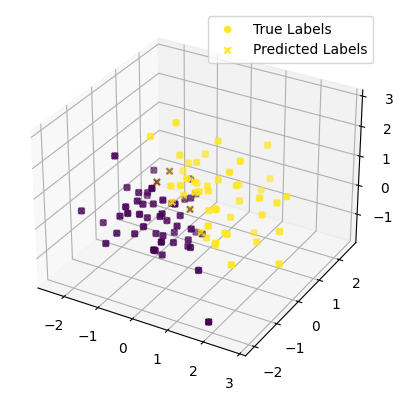

In [51]:
# Make some predictions
y_pred = model(x)
y_pred_labels = torch.max(y_pred.detach(), dim=1)[1]  # Get the index of the max log-probability.

# Visualize the true and predicted labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for true labels
scatter_true = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=torch.max(y, 1)[1], marker='o')
# Scatter plot for predicted labels
scatter_pred = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred_labels, marker='x')

plt.legend([scatter_true, scatter_pred], ['True Labels', 'Predicted Labels'])
plt.show()

Let's test the performance of the model on unseen data. A testing loop is quite similar to a training loop, except that we don't compute gradients or update the model parameters. Instead, we compute the predictions for the test data and compare them to the true labels to evaluate the model's performance. We will pass `torch.eval` to turn off any training functionality during each epoch, and enter the `torch.inference_mode` context manager to disable gradient tracking for inference.

In [52]:
# Let's say we have some additional test data `x_test` and `y_test`
x_test = torch.randn(20, input_size)
y_test = torch.nn.functional.one_hot(torch.where(x_test[:, 0] + x_test[:, 1] + x_test[:, 2] + 0.5 * torch.randn(20) > 0, 1, 0)).float()

In [53]:
model = BinaryLogisticRegression(input_size=input_size, n_classes=2)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Let's begin the training loop. For each epoch, we will perform forward propagation, compute the loss, perform backpropagation, and update the model parameters. We will also evaluate the model's performance on the test data.

In [54]:
num_epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(num_epochs):
    outputs = model(x)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing 
    model.eval()

    with torch.inference_mode():
        test_outputs = model(x_test)
        test_loss = criterion(test_outputs, y_test)

    # append to plot
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f'Epoch {epoch+1}/{num_epochs}, MAE Train Loss: {loss.item()}, MAE Test Loss: {test_loss.item()}')

Epoch 1/100, MAE Train Loss: 0.6890044212341309, MAE Test Loss: 0.7852061986923218
Epoch 2/100, MAE Train Loss: 0.6814649105072021, MAE Test Loss: 0.7746222615242004
Epoch 3/100, MAE Train Loss: 0.6741028428077698, MAE Test Loss: 0.76427161693573
Epoch 4/100, MAE Train Loss: 0.6669139266014099, MAE Test Loss: 0.754149854183197
Epoch 5/100, MAE Train Loss: 0.6598940491676331, MAE Test Loss: 0.74425208568573
Epoch 6/100, MAE Train Loss: 0.6530390977859497, MAE Test Loss: 0.7345737814903259
Epoch 7/100, MAE Train Loss: 0.6463450789451599, MAE Test Loss: 0.7251102328300476
Epoch 8/100, MAE Train Loss: 0.6398078203201294, MAE Test Loss: 0.7158566117286682
Epoch 9/100, MAE Train Loss: 0.6334234476089478, MAE Test Loss: 0.7068084478378296
Epoch 10/100, MAE Train Loss: 0.6271879076957703, MAE Test Loss: 0.6979609727859497
Epoch 11/100, MAE Train Loss: 0.6210973858833313, MAE Test Loss: 0.6893098950386047
Epoch 12/100, MAE Train Loss: 0.61514812707901, MAE Test Loss: 0.6808503270149231
Epoch 13

Now that the training is done, let's plot the training and testing loss for each epoch. This will help us understand the model's learning process.

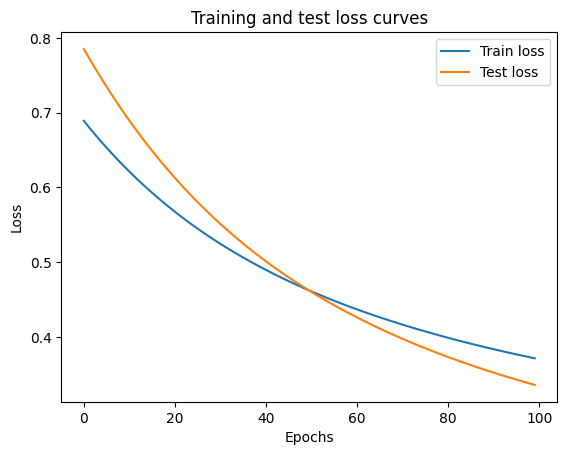

In [55]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Finally, we'll use the trained model to make predictions on the training and test data. Let's also visualise the true and predicted labels in a 3D scatter plot.

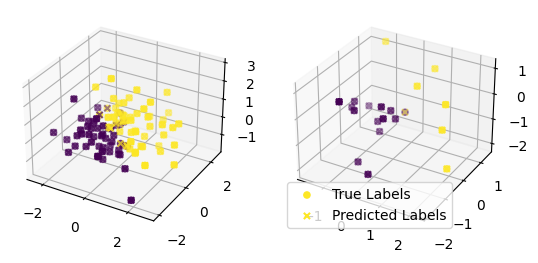

In [56]:
# Make some predictions
y_pred = model(x)
y_pred_labels = torch.argmax(y_pred.detach(), dim=1)  # find class index with max value

y_test_pred = model(x_test).detach()
y_test_pred_labels = torch.argmax(y_test_pred.detach(), dim=1)  # find class index with max value

# Visualize the true and predicted labels
fig = plt.figure()
axs0 = fig.add_subplot(121, projection='3d')
axs1 = fig.add_subplot(122, projection='3d')

# Scatter plot for true labels
scatter_true = axs0.scatter(x[:, 0], x[:, 1], x[:, 2], c=torch.argmax(y, dim=1), marker='o')  # use class index
# Scatter plot for predicted labels
scatter_pred = axs0.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred_labels, marker='x')

# Scatter plot for true labels
scatter_test_true = axs1.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=torch.argmax(y_test, dim=1), marker='o')  # use class index
# Scatter plot for predicted labels
scatter_test_pred = axs1.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_test_pred_labels, marker='x')

plt.legend([scatter_true, scatter_pred], ['True Labels', 'Predicted Labels'])
plt.show()


#### Saving and loading a PyTorch model 💾

Naturally, it is possible to save and load PyTorch models. This is crucial when you need to save the state of your trained model for future use without having to retrain it, or if you want to share your model so others can reproduce your work. 

PyTorch provides us with three key methods to perform these operations:

| PyTorch method | What does it do? | 
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialised object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  | 
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialise and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. | 

We will see this methods in action later in the notebook.

#### From Logistic Regression to Neural Networks

We have been using logistic regression as a tool to understand the building blocks of PyTorch: tensors, automatic differentiation, loss functions, and the training process. 

However, logistic regression is quite limited. It can only learn a linear boundary between classes, and it assumes that the input features are independent of each other. These limitations make it unsuitable for many real-world tasks, where the relationship between features and target variable is often complex and non-linear.

A more powerful and flexible model to handle such tasks is a neural network. The structure of a neural network allows us to learn more complicated patterns. At its core, a neural network is simply a stacked version of the logistic regression units we have seen so far. But instead of having a single linear layer followed by an activation function (like we did in logistic regression), in a neural network we have many such layers, hence the term 'deep' learning.

This structure, along with different activation functions, gives neural networks the ability to approximate any function, given enough neurons and layers. This is what's called the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

Let's illustrate what we just said. We started from a linear regression, where we had a linear relationship between the inputs and the output:

$$
y = w * x + b
$$

Then we moved to logistic regression, where we added a sigmoid activation function to squash the output between 0 and 1:

$$
y = \sigma(w * x + b)
$$

Now in a neural network, we just stack multiple of these logistic units together. If we have two layers, it would look something like this:

$$
h = \sigma(w_{1} * x + b_{1}) \\
y = \sigma(w_{2} * h + b_{2})
$$

We can have as many hidden layers as we want, with as many neurons in each layer as we want, and we can use different activation functions (ReLU, tanh, etc.) to introduce non-linearities in the model. This makes neural networks extremely versatile and powerful.


<img src="https://www.ibm.com/blog/wp-content/uploads/2023/07/deep-neural-network.png" width="600" height="400">

##### Different Activation Functions 

Activation functions are used to introduce non-linearity in the neural network, helping it to learn from the complex patterns in the data. When we do not use a activation function in the network, its output is simply a linear transformation of the input. Linear transformations are easy to compute and analyse, but they are not able to capture complex patterns and structures in the data.

Let's take a look at some of the commonly used activation functions in neural networks:

- **Sigmoid**: It maps the input values between 0 and 1, providing a clear distinction between outputs. It's useful in the last layer of a binary classification network, but it is seldom used in hidden layers because of problems like vanishing gradients.

- **Softmax**: Softmax is the multi-class generalisation of the sigmoid function for classification problems. It generates the probabilities for the output, and the probabilities sum will be 1.

- **Tanh**: The tanh function maps the input values between -1 and 1. It is zero-centered, making it easier to model inputs that have strongly negative, neutral, and strongly positive values.

- **ReLU (Rectified Linear Unit)**: ReLU is the most commonly used activation function in neural networks. It gives an output x if x is positive and 0 otherwise. ReLU is linear for all the positive values, and zero for all the negative values, providing the ability to activate neurons based on the positivity of input.

- **Leaky ReLU**: It is a variant of ReLU. Instead of being zero when x < 0, a leaky ReLU allows a small, non-zero gradient α. The idea is to prevent the "dying ReLU" problem where a neuron never activates again because it always falls in the zero region of ReLU during the training.

In the next section, we'll introduce how to create a simple feed-forward neural network in PyTorch.


#### Building a Neural Network in PyTorch

In the previous sections, we have discussed about the limitations of logistic regression and how neural networks, with their ability to learn complex patterns and structures, offer a way to address these limitations. The introduction of different activation functions further enhances the learning capacity of these networks. 

Now, let's get hands-on with PyTorch again and learn how to construct a simple feed-forward neural network, also known as a Multi-Layer Perceptron (MLP). 

We'll be using PyTorch's `nn.Module` again, which provides a clean and flexible way to define complex models. We'll also see how to use different activation functions within our model. 

In the MLP we're about to construct, the input passes through multiple layers of neurons. Each layer is fully connected to the next one, and data flows from input to output without looping back. These characteristics give this type of network its "feed-forward" name. 

Let's start coding our first neural network!


In [57]:
import torch.nn as nn
import torch.nn.functional as F # convenience

class BasicNeuralNetwork(nn.Module):
    """A basic neural network model.
    """
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 3)
        self.linear2 = nn.Linear(3, n_classes)
        
    def forward(self, x):
        """Forward pass of the neural network.
        """
        x = self.linear1(x)
        x = F.sigmoid(x)
        x = self.linear2(x)
        return F.sigmoid(x)

We're still working with our first binary classification example. As such, we'll still employ Binary Cross Entropy to compute our loss.

In [58]:
model = BasicNeuralNetwork(input_size=input_size, n_classes=2)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [59]:
num_epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(num_epochs):
    outputs = model(x)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing 
    model.eval()

    with torch.inference_mode():
        test_outputs = model(x_test)
        test_loss = criterion(test_outputs, y_test)

    # append to plot
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f'Epoch {epoch+1}/{num_epochs}, MAE Train Loss: {loss.item()}, MAE Test Loss: {test_loss.item()}')

Epoch 1/100, MAE Train Loss: 0.7111880779266357, MAE Test Loss: 0.7612993121147156
Epoch 2/100, MAE Train Loss: 0.7102023363113403, MAE Test Loss: 0.7595011591911316
Epoch 3/100, MAE Train Loss: 0.7092323899269104, MAE Test Loss: 0.7577353715896606
Epoch 4/100, MAE Train Loss: 0.7082778215408325, MAE Test Loss: 0.7560006380081177
Epoch 5/100, MAE Train Loss: 0.7073379755020142, MAE Test Loss: 0.7542963027954102
Epoch 6/100, MAE Train Loss: 0.7064120769500732, MAE Test Loss: 0.7526212930679321
Epoch 7/100, MAE Train Loss: 0.7054998874664307, MAE Test Loss: 0.7509749531745911
Epoch 8/100, MAE Train Loss: 0.7046005129814148, MAE Test Loss: 0.7493559718132019
Epoch 9/100, MAE Train Loss: 0.7037138938903809, MAE Test Loss: 0.747763991355896
Epoch 10/100, MAE Train Loss: 0.7028391361236572, MAE Test Loss: 0.7461978197097778
Epoch 11/100, MAE Train Loss: 0.70197594165802, MAE Test Loss: 0.7446569204330444
Epoch 12/100, MAE Train Loss: 0.7011237144470215, MAE Test Loss: 0.7431403994560242
Epoc

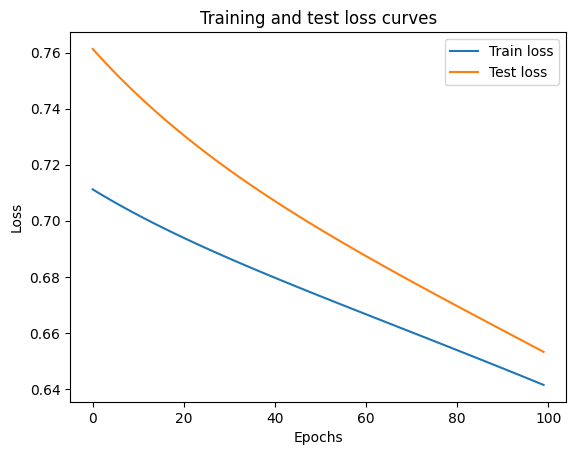

In [60]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Despite the potential of Neural Networks to model complex relationships and interactions among features, our basic three-layered neural network model performed worse than the initial binary logistic regression model for the same number of epochs. The reason for this degradation in performance is likely due to the complexity of the neural network model and the relatively small size of our dataset.

Our neural network model has many more parameters than the logistic regression model. These parameters need to learn the structure in the data to make accurate predictions. However, with a small dataset, the amount of structure or information available to learn from is limited. This can cause the model to overfit, where it learns the noise in the training set instead of the underlying structure of the data, resulting in poor generalisation to unseen data (i.e., test set).

Beyond data concerns, there are several levers one can pull to improve model performance. These are presented below (credit goes to Daniel Bourke):

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimiser decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

An **amazing** resource to practice how these hyperparameters affect model performance is Tensorflow's [Playground](https://playground.tensorflow.org/).

#### Branching out: Regression and classification with different data types 📏

What we've seen so far can be applied across a broad range of problems in machine learning. From simple binary classification, we extended our problem to multi-class classification with a more complex neural network model. In doing so, we've primarily dealt with simple, tabular data, where each instance or observation in our dataset is represented by a fixed set of features. However, the beauty of machine learning, and deep learning in particular, is that these same principles can be applied to vastly different types of data and problems.

Let's begin with a multi-class classification problem that uses text as input data.

##### 1. Surname Origin multi-class prediction 📕

In this section, we will explore a multi-class prediction problem, where the objective is to predict the origin of a surname based on the character sequences that it contains. By treating each surname as a sequence of characters, we can leverage a range of sequence learning techniques to build our predictive model. The task is to learn a mapping from sequences of characters to a specific nationality, effectively learning the implicit rules that often determine how surnames are formed in different cultures. This type of predictive task has broad applications, from natural language processing to bioinformatics, and provides an interesting example of how sequence data can be effectively handled using modern machine learning techniques.

In [66]:
surnames = getter.get_surnames()
surnames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   surnames  503 non-null    object
 1   country   503 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [67]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))

X = vectorizer.fit_transform(surnames['surnames'])

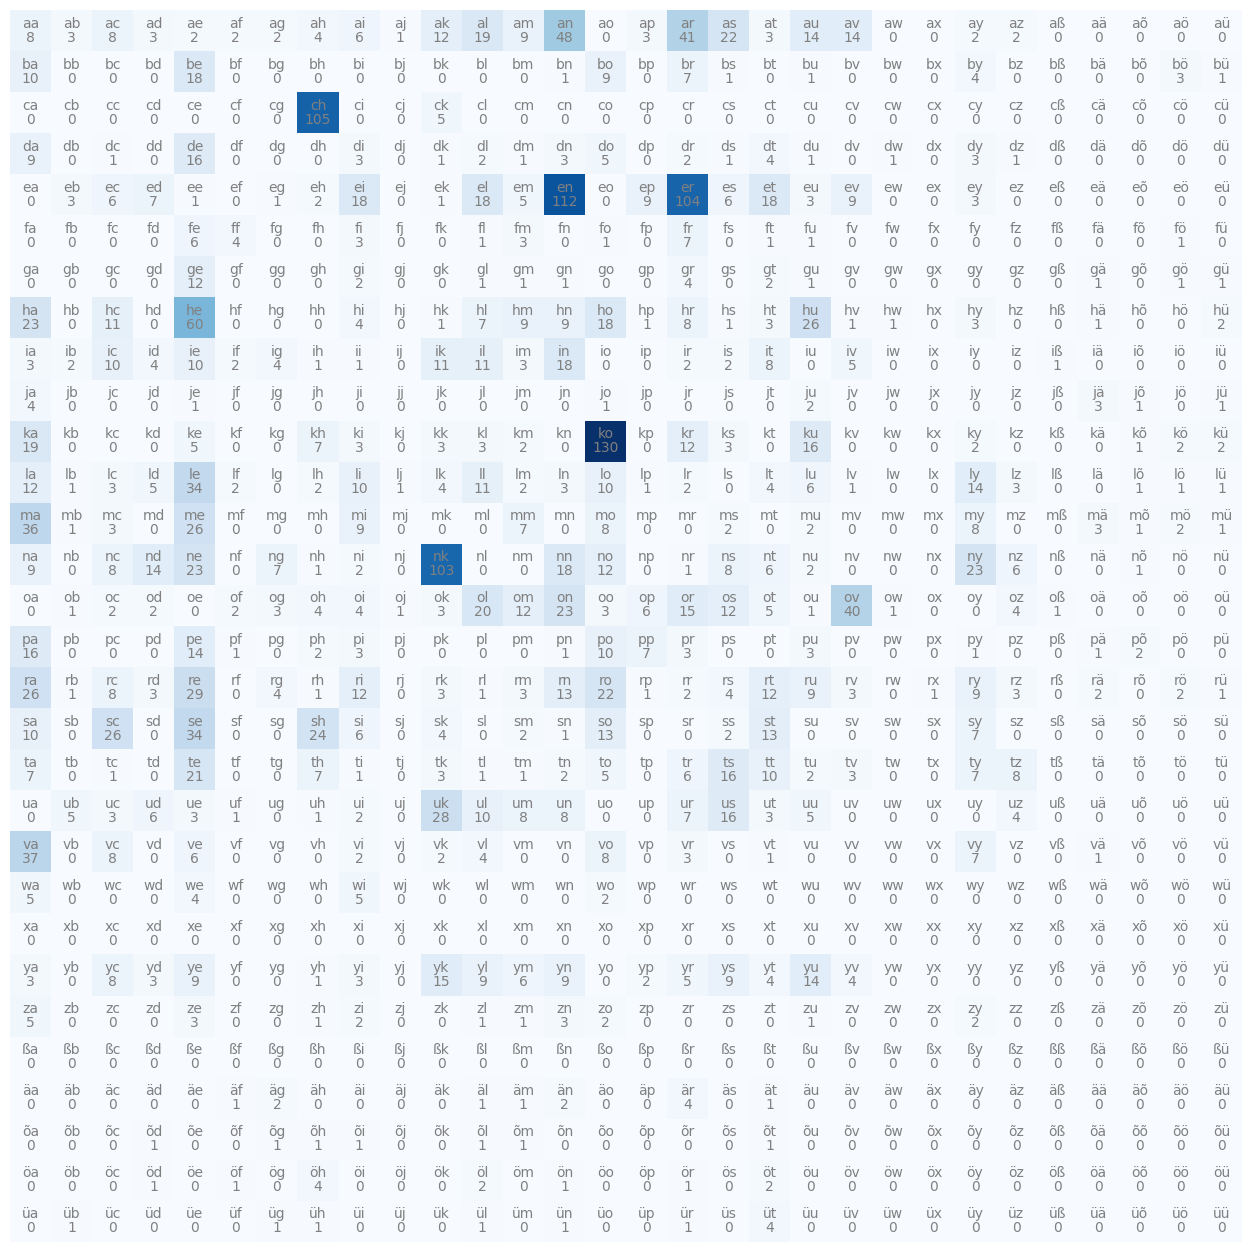

In [68]:
from utils import plot_bicharacters
plot_bicharacters(vectorizer, X)

We'll start by transforming the 2-character combinations into a tensor. Then, we will one-hot encode the nationalities for our target variable.

In [69]:
X = torch.tensor(X.toarray(), dtype=torch.float32)

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(surnames['country'])
y = torch.tensor(y, dtype=torch.long) # Note we're not using (n_samples, n_classes) here. If you want, you can do it using F.one_hot, and changing the loss function to BCEWithLogitsLoss for one-to-many cross-entropies.

We'll then split the data into training and test sets. We'll use 80% of the data for training and 20% for testing.

In [71]:
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

Let's set our hyperparameters for the network such as the input size, output size, hidden layer size, batch size, learning rate, and number of epochs.

In [72]:
input_size = X.shape[1] # Number of unique bigrams
output_size = 3 # Number of nationalities
hidden_size = 100 # Size of hidden layer
batch_size = 8 # Number of samples to process at a time - useful for computational efficiency, memory usage, generalisation, etc.
learning_rate = 0.01
num_epochs = 100

We need to create a DataLoader that will help us handle the data efficiently during training.

In [73]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Let's now define the structure of our neural network. It will have one hidden layer with ReLU activation, and the output layer will not have an activation function since we will be using the CrossEntropyLoss which combines LogSoftmax and NLLLoss in one single class.

In [74]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size)

We'll be using CrossEntropyLoss as our loss function and Adam as our optimiser.

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Adam loss! Faster convergence, possibly worse results than SGD.

We train the network for a certain number of epochs, where in each epoch we use the DataLoader to get batches of data and feed them into our network.

In [76]:
for epoch in range(num_epochs):
    for i, (bigrams, labels) in enumerate(train_loader):
        outputs = model(bigrams)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Batch {i}, Loss: {loss.item()}')

Epoch 1/100, Batch 0, Loss: 1.0890389680862427
Epoch 1/100, Batch 1, Loss: 1.0695576667785645
Epoch 1/100, Batch 2, Loss: 1.0457504987716675
Epoch 1/100, Batch 3, Loss: 0.8859725594520569
Epoch 1/100, Batch 4, Loss: 1.0808008909225464
Epoch 1/100, Batch 5, Loss: 1.009769320487976
Epoch 1/100, Batch 6, Loss: 0.9312697649002075
Epoch 1/100, Batch 7, Loss: 0.7540796995162964
Epoch 1/100, Batch 8, Loss: 0.5926603078842163
Epoch 1/100, Batch 9, Loss: 1.0162265300750732
Epoch 1/100, Batch 10, Loss: 1.0030401945114136
Epoch 1/100, Batch 11, Loss: 0.6203078031539917
Epoch 1/100, Batch 12, Loss: 0.666469395160675
Epoch 1/100, Batch 13, Loss: 0.7710064649581909
Epoch 1/100, Batch 14, Loss: 1.0337122678756714
Epoch 1/100, Batch 15, Loss: 0.5781669616699219
Epoch 1/100, Batch 16, Loss: 0.4154706299304962
Epoch 1/100, Batch 17, Loss: 0.3472510576248169
Epoch 1/100, Batch 18, Loss: 0.3932449519634247
Epoch 1/100, Batch 19, Loss: 0.6176036596298218
Epoch 1/100, Batch 20, Loss: 0.9233391880989075
Epoc

After training the model, we evaluate its performance on the test set.

In [88]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_predicted = []
    for bigrams, labels in test_loader:
        outputs = model(bigrams)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted += predicted.tolist()

    print(f'Accuracy: {100 * correct / total}%')


Accuracy: 82.17821782178218%


Finally, we create a confusion matrix to visualise how well our model performed for each nationality.

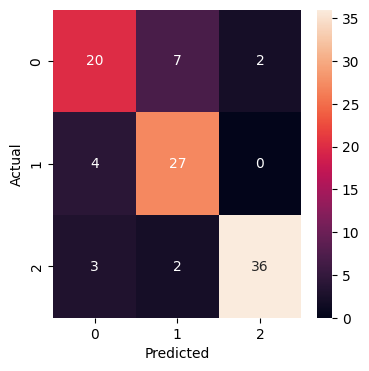

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, all_predicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### 2. Panel Data Regression - Bike Sharind Demand prediction 🚴

Let's shift gears to regression problems using panel data. Panel data, also known as longitudinal data, are multi-dimensional data involving measurements over time. The popular Bike Sharing Demand dataset provides an ideal case for such an analysis. The dataset comprises hourly rental data spanning two years from a bike sharing service in Washington, D.C., USA. The data includes environmental and seasonal variables, providing rich, multi-dimensional, time-series data. The objective is to predict the count of total bike rentals at each hour based on these variables, essentially a time-series regression task.

In [90]:
bike_sharing = getter.get_bike_demand()

In [91]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


One common technique in time-series analysis is to use lagged variables as predictors. A lagged variable is a variable that has been shifted forward in time. For example, to predict the bike count at a given hour, we could use the bike counts from the previous few hours as predictors. These lagged variables can capture temporal patterns and trends in the data, such as daily or weekly cycles in bike demand.

Let's proceed with pre-processing the data, creating lagged variables, and splitting the data into training and test sets.

In [92]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

# Create lagged variables
for i in range(1, 4):
    bike_sharing[f'lag_{i}'] = bike_sharing['cnt'].shift(i)

# Drop rows with missing values
bike_sharing.dropna(inplace=True)

The count of rented bikes can depend on factors such as the time of the day, day of the week, or even the season of the year. Because of these temporal dependencies, it's not appropriate to perform a random train-test split, as is done in non-time-series tasks. Doing so could result in temporal leakage, where information from the future could be used to predict the past.

Instead, we perform a chronological split of the data. The training set consists of the earliest data points, and the test set consists of the latest data points. This way, our model is trained on past data and tested on future data, as would be the case in real-world prediction tasks.

In [93]:
train = bike_sharing[bike_sharing['dteday'] < pd.to_datetime('2012-10-01')]
test = bike_sharing[bike_sharing['dteday'] >= pd.to_datetime('2012-10-01')]

Let's convert the train and test sets into PyTorch tensors.

In [94]:
X_train = torch.tensor(train.drop(columns=['dteday', 'cnt']).values, dtype=torch.float)
y_train = torch.tensor(train['cnt'].values, dtype=torch.float).view(-1, 1)

X_test = torch.tensor(test.drop(columns=['dteday', 'cnt']).values, dtype=torch.float)
y_test = torch.tensor(test['cnt'].values, dtype=torch.float).view(-1, 1)

We'll also normalise the features, which often leads to better training dynamics and less extreme values in your activation functions

In [95]:
mean = X_train.mean(dim=0)
std = X_train.std(dim=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

Let's create the loader objects.

In [96]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32)

Next, we'll define our neural network. We'll make this network slightly larger, on account of the higher dimensional feature space and large dataset.

In [97]:
class BikeSharingNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x
    
model = BikeSharingNN()

Note that the last layer has no activation function. In this case, we'll also select a loss criterion that doesn't perform non-linear transformations. Instead, due to this being a regression exercise, we can seek to minimise the square error of the predictions. 

In [98]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Nothing to do but train the model now!

In [99]:
num_epochs = 40
for epoch in range(num_epochs):
    for i, batch in enumerate(train_loader):
        inputs, targets = batch
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {i}, Loss: {loss.item()}')

Epoch 1/40, Batch 9, Loss: 6596.4951171875
Epoch 1/40, Batch 19, Loss: 4024.616943359375
Epoch 1/40, Batch 29, Loss: 8910.142578125
Epoch 1/40, Batch 39, Loss: 8551.6005859375
Epoch 1/40, Batch 49, Loss: 8273.6865234375
Epoch 1/40, Batch 59, Loss: 14485.939453125
Epoch 1/40, Batch 69, Loss: 20345.478515625
Epoch 1/40, Batch 79, Loss: 40838.8046875
Epoch 1/40, Batch 89, Loss: 42710.09765625
Epoch 1/40, Batch 99, Loss: 45564.984375
Epoch 1/40, Batch 109, Loss: 42180.19140625
Epoch 1/40, Batch 119, Loss: 53923.3046875
Epoch 1/40, Batch 129, Loss: 54244.0390625
Epoch 1/40, Batch 139, Loss: 57672.7734375
Epoch 1/40, Batch 149, Loss: 15755.833984375
Epoch 1/40, Batch 159, Loss: 27975.2109375
Epoch 1/40, Batch 169, Loss: 19947.18359375
Epoch 1/40, Batch 179, Loss: 35976.03125
Epoch 1/40, Batch 189, Loss: 21432.970703125
Epoch 1/40, Batch 199, Loss: 19688.916015625
Epoch 1/40, Batch 209, Loss: 15340.439453125
Epoch 1/40, Batch 219, Loss: 11068.435546875
Epoch 1/40, Batch 229, Loss: 15867.02734

And test its performance on the test set.

In [100]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# Calculate the root mean square error (RMSE)
rmse = torch.sqrt(criterion(predictions, y_test)).item()
print(f'Test RMSE: {rmse}')

Test RMSE: 3.6876959800720215


In [101]:
train.loc[:, "predictions"] = model(X_train).detach().numpy()
test.loc[:, "predictions"] = model(X_test).detach().numpy()

Let's plot our predictions. Now, hourly rates make for poor visualisation, so let's aggregate to the day level.

In [102]:
bike_sharing = bike_sharing.groupby(["dteday"]).agg({"cnt": "mean"}).reset_index()
train = train.groupby(["dteday"]).agg({"cnt": "mean", "predictions": "mean"}).reset_index()
test = test.groupby(["dteday"]).agg({"cnt": "mean", "predictions": "mean"}).reset_index()

In [103]:
bike_sharing = bike_sharing[bike_sharing.dteday >= "2012-06-01"]
train = train[train.dteday >= "2012-06-01"]

# Define the line for true values
true_line = alt.Chart(bike_sharing).mark_line().encode(
    x='dteday:T',
    y='cnt:Q',
    color=alt.value('black')
)

# Define the line for training predictions
train_line = alt.Chart(train).mark_line(strokeDash=[5,5]).encode(
    x='dteday:T',
    y='predictions:Q',
    color=alt.value('blue')
)

# Define the line for test predictions
test_line = alt.Chart(test).mark_line(strokeDash=[5,5]).encode(
    x='dteday:T',
    y='predictions:Q',
    color=alt.value('green')
)

# Combine all three lines into a single plot
alt.layer(true_line, train_line, test_line)

alt.LayerChart(...)

##### 3. Estimating Estonian Scenes: A Binary-class image classification problem 🏠/🌲

In this example, we will approach an image classification problem. We will be working with a set of images that depict either Estonian cities or Estonian nature scenes. Our goal is to develop a model capable of identifying which type of scene each image presents.

The data we are dealing with comprises 100 images, each of 224 x 224 x 3 pixels, meaning we have a rather high-dimensional problem on our hands. Let's get on coding!

In [140]:
images = getter.get_images()
image_labels = getter.get_image_labels()

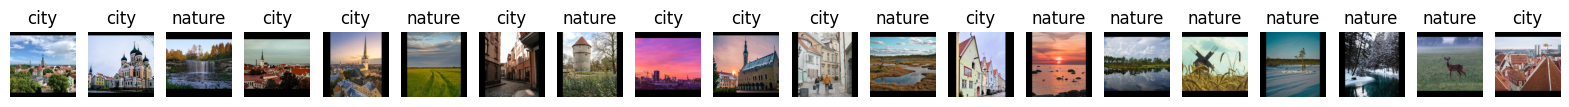

In [141]:
images = [i[1] for i in images]
labels = image_labels.iloc[:20]["class"].tolist()

fig = plt.figure(figsize=(20, 1))
for i, (image_file, image_label) in enumerate(zip(images[:20], labels[:20])):  
    plt.subplot(1, 20, i+1)
    plt.title(image_label)
    plt.imshow(image_file)
    plt.axis('off')

plt.show()

Let's use some of the modules from `torchvision`, a library that contains many useful tools and methods for wrangling image data. In this case, we will simply define the pipeline that sets the 224 x 224 x 3 tensor and rescales the [0,255] values to be between [0, 1].

In [142]:
from torchvision import transforms

# Define a transformer to convert PIL image to PyTorch tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # convert to tensor and scale to [0, 1]
])

In [143]:
images = torch.stack([transform(image) for image in images])
images.shape

torch.Size([100, 3, 224, 224])

Now we go back to the familiar set of steps we've seen twice already.

In [144]:
# Create output label tensor
le = LabelEncoder()
y = le.fit_transform(image_labels['class'])
y = torch.tensor(y, dtype=torch.long)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

# Create dataloaders
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=4, shuffle=True)
test_ds = TensorDataset(X_test, y_test)
test_dl = DataLoader(test_ds, batch_size=4, shuffle=True)

X_train.shape

torch.Size([80, 3, 224, 224])

Let's proceed to build our model. Notice that our architecture employs traditional, fully-connected layers, a design choice that causes us to forego any spatial relationship between the pixels. Instead, we opt to flatten the 224 x 224 x 3 image inputs into a long 224 * 224 * 3 vector. This approach may seem counterintuitive, especially considering that images inherently possess spatial information that could be crucial to understanding and interpreting them. Indeed, you may start to suspect that fully connected networks are not the most efficient or effective method to tackle image-based tasks - and you'd be right. 

Conventional neural networks tend to perform poorly on image data due to this lack of spatial consideration. In upcoming sections, we will introduce Convolutional Neural Networks (CNNs), a type of network that is specifically designed for image processing and preserves spatial relationships, thereby achieving significantly better performance. However, for this simple case, we will stick with a standard fully connected network to establish the baseline.

In [145]:
class ImageNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Input tensor has shape (batch_size, 3, 224, 224)
        self.flatten = nn.Flatten()  # flatten the input
        self.layer1 = nn.Linear(3 * 224 * 224, 256)  # first hidden layer
        self.layer2 = nn.Linear(256, 64)  # second hidden layer
        self.layer3 = nn.Linear(64, 32)  # output layer (2 classes)
        self.layer4 = nn.Linear(32, 2)  # output layer (2 classes)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input
        x = F.relu(self.layer1(x))  # First hidden layer with ReLU activation
        x = F.relu(self.layer2(x))  # Second hidden layer with ReLU activation
        x = F.relu(self.layer3(x))  # Third layer with ReLU activation
        x = self.layer4(x)  # Output layer
        return x

In [146]:
# Initialize the model, loss function and optimizer
model = ImageNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

An important aside is [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html), a visualisation tool that can help us track and understand the training process of our neural networks. Originally designed for TensorFlow, it's compatible with PyTorch and offers various functionalities: monitoring training progress, comparing runs, visualising model structures, and more.

In this image classification example, we could leverage TensorBoard to track our loss and accuracy over time, compare the performance of different architectures, and even visualise the model's feature maps. By logging this data during training using a SummaryWriter, and running TensorBoard pointing to our logging directory, we would have a dynamic and interactive way to inspect and understand our model's behavior, which can greatly aid in debugging and improving our model.

A very good tutorial exists [here](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html) to delve deeper in TensorBoard.

In [148]:
import torchvision
grid = torchvision.utils.make_grid(images)
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
writer.add_image('images', grid, 0)
writer.add_graph(model, images)
writer.close()

Let's now go back to training our model. This will take over a minute...

In [149]:
# Training loop
n_epochs = 20  # Number of epochs

for epoch in range(n_epochs):
    for images, labels in train_dl:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # compute loss for test
        with torch.inference_mode():
            test_loss = criterion(model(X_test), y_test)

        # If you have tensorflow installed, you can uncomment the following line to see the progress updates
        writer.add_scalar('Loss/train', loss.item(), epoch)
        writer.add_scalar('Loss/test', test_loss.item(), epoch)
        
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')


Epoch 1/20, Loss: 1.2702382802963257
Epoch 2/20, Loss: 0.597915530204773
Epoch 3/20, Loss: 0.7095374464988708
Epoch 4/20, Loss: 0.8338541388511658
Epoch 5/20, Loss: 0.8348898887634277
Epoch 6/20, Loss: 0.6132397651672363
Epoch 7/20, Loss: 0.9250859022140503
Epoch 8/20, Loss: 0.904065728187561
Epoch 9/20, Loss: 0.7982675433158875
Epoch 10/20, Loss: 0.6251799464225769
Epoch 11/20, Loss: 0.7104304432868958
Epoch 12/20, Loss: 0.6208819150924683
Epoch 13/20, Loss: 0.624354898929596
Epoch 14/20, Loss: 0.7105922102928162
Epoch 15/20, Loss: 0.7119946479797363
Epoch 16/20, Loss: 0.7083648443222046
Epoch 17/20, Loss: 0.6175960302352905
Epoch 18/20, Loss: 0.8913917541503906
Epoch 19/20, Loss: 0.7105733156204224
Epoch 20/20, Loss: 0.6224048733711243


In [150]:
# Test the network
correct = 0
total = 0
misclassified_images = []
misclassified_labels = []
correct_images = []
correct_labels = []
predicted_labels = []

with torch.no_grad():
    for data in test_dl:
        images, labels = data
        outputs = model(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Check for misclassifications
        for image, label, prediction in zip(images, labels, predicted):
            if label != prediction:
                misclassified_images.append(image)
                misclassified_labels.append(label.item())
                predicted_labels.append(prediction.item())
            else:
                correct_images.append(image)
                correct_labels.append(label.item())

print('Accuracy of the network on test images: %d %%' % (100 * correct / total))

Accuracy of the network on test images: 55 %


In [151]:
# Convert lists to tensors for easier manipulation
misclassified_images = torch.stack(misclassified_images)
misclassified_labels = torch.tensor(misclassified_labels)
predicted_labels = torch.tensor(predicted_labels)

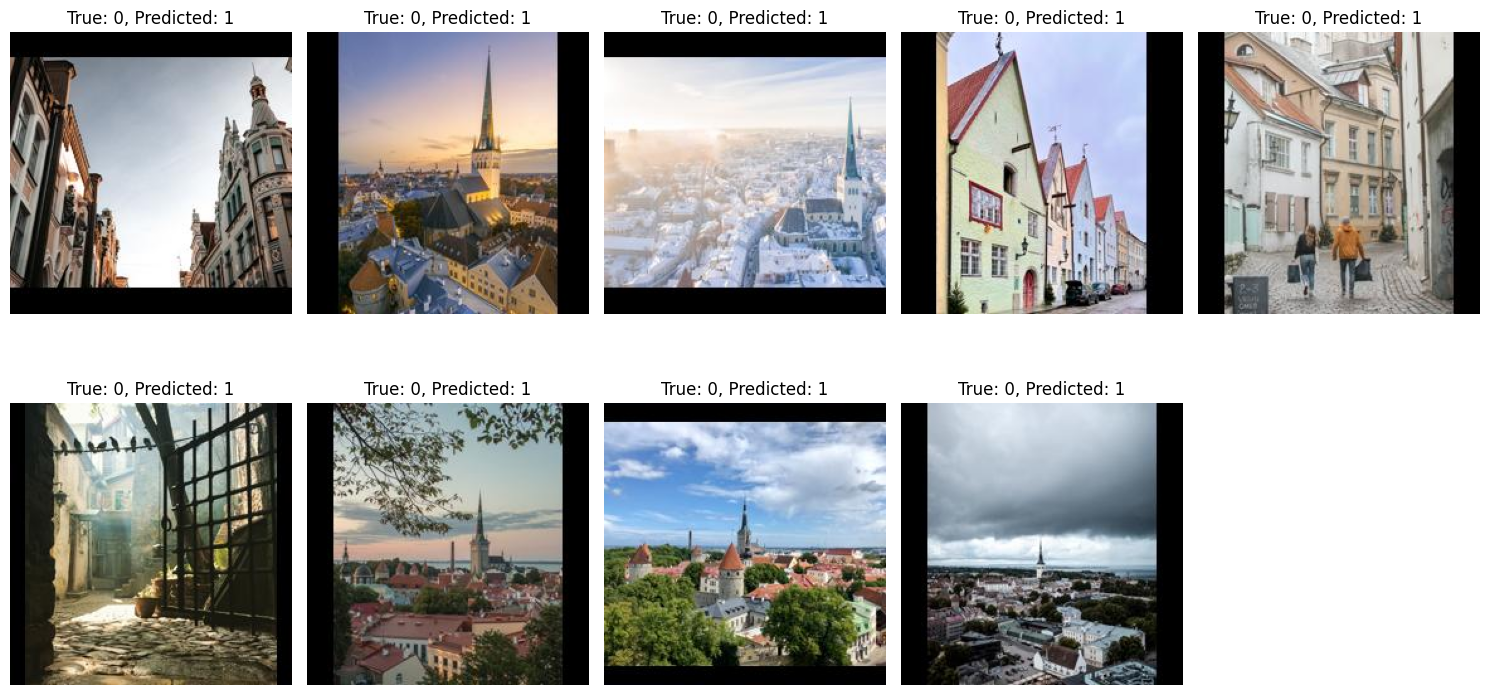

In [152]:
fig = plt.figure(figsize=(15, 15))
for i in range(len(misclassified_images)):
    ax = fig.add_subplot(4, 5, i+1)  # Assuming a maximum of 20 misclassifications
    img = misclassified_images[i].permute(1, 2, 0).numpy()  # convert to numpy and rearrange dimensions
    ax.imshow(img)
    ax.set_title(f"True: {misclassified_labels[i]}, Predicted: {predicted_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


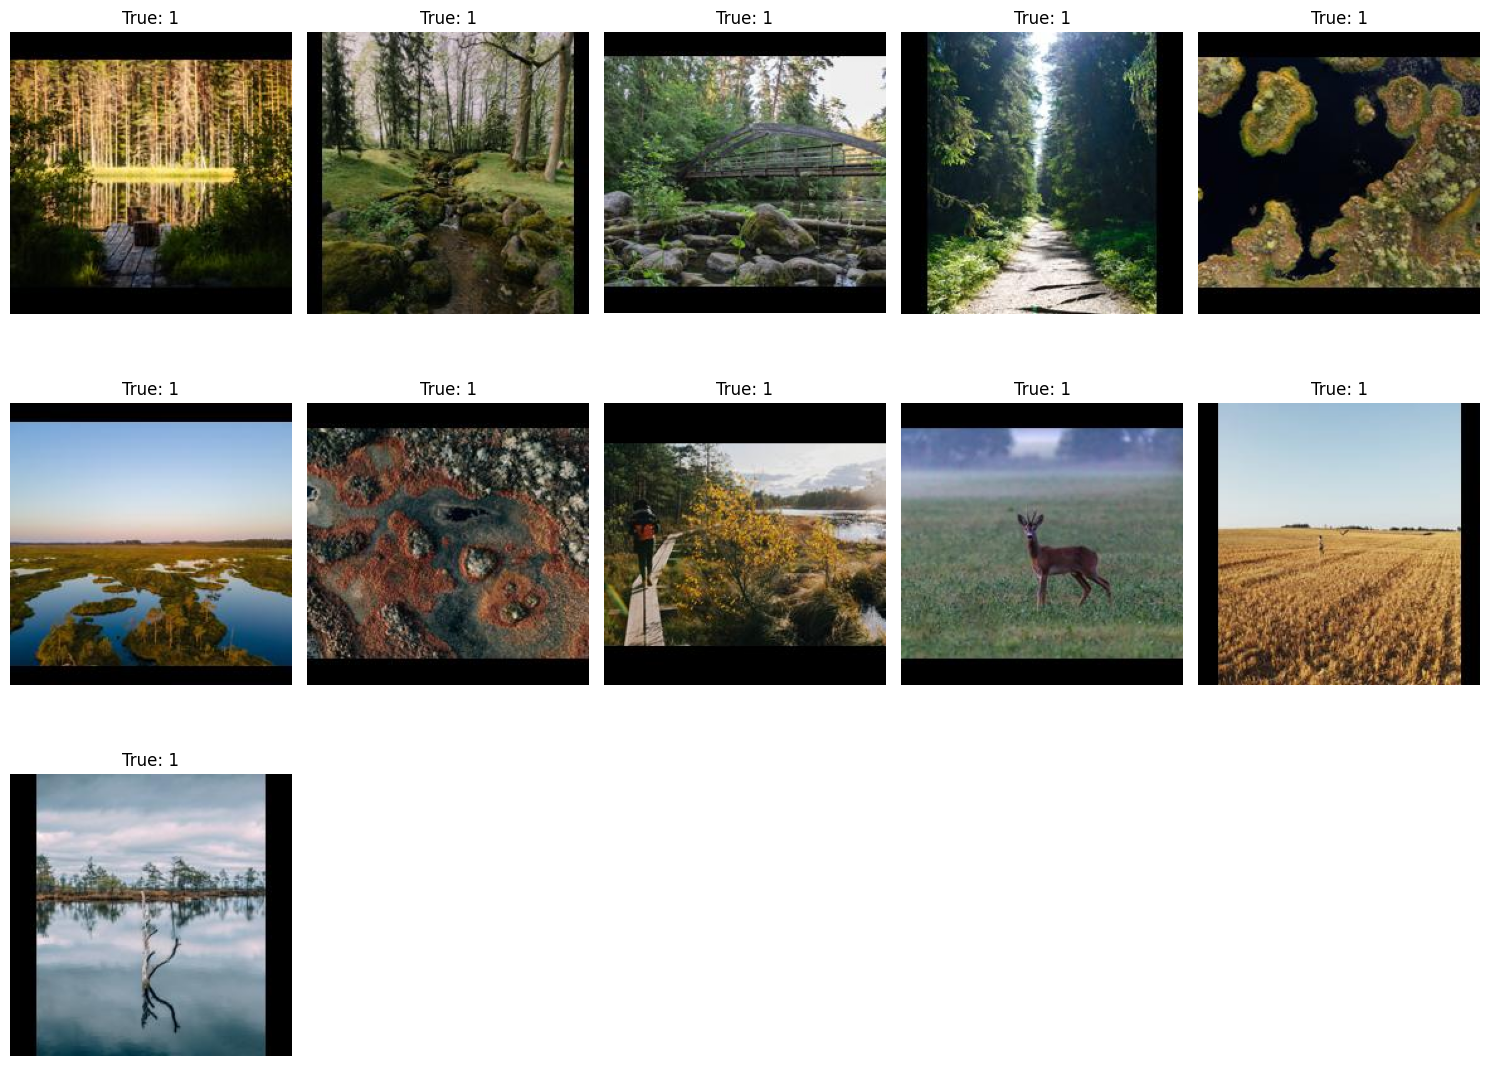

In [153]:
fig = plt.figure(figsize=(15, 15))
for i in range(len(correct_images)):
    ax = fig.add_subplot(4, 5, i+1)  # Assuming a maximum of 20 misclassifications
    img = correct_images[i].permute(1, 2, 0).numpy()  # convert to numpy and rearrange dimensions
    ax.imshow(img)
    ax.set_title(f"True: {correct_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In our analysis, it is apparent that the model struggled to effectively discriminate between images of Estonian cities and nature. Rather intriguingly, the model seemed to have learned to always predict the 'nature' class. The slight imbalance in our training data — favoring nature images — might have influenced this tendency. By always predicting 'nature', the model minimised its loss, as it was indeed correct more often.

This behavior illustrates a fundamental limitation of using fully connected layers for image classification tasks. In such networks, the spatial structure and locality of the input are not taken into consideration, and each pixel is treated independently. In the context of image processing, this disregards crucial information: the relationship between a pixel and its neighbors.

#### Convolutional Neural Networks

To capture the spatial relationships mentioned above, we can use Convolutional Neural Networks (CNNs), a type of Neural Network that is specifically designed to process grid-like data, such as images. Unlike standard Neural Networks, CNNs maintain the spatial relationship between pixels by learning internal feature representations using small squares of input data. This is accomplished through the use of specialised layers (Convolutional Layers, Pooling Layers) before flattening the data and passing it to Fully Connected Layers.

![](https://www.researchgate.net/profile/Serkan_Kiranyaz/publication/313676923/figure/fig2/AS:461584393871361@1487061703456/A-standard-2D-CNN-10.png)

CNNs have a couple of advantages over standard Neural Networks for image processing. First, they are translation invariant, ie., they can recognise patterns regardless of where they are located in the image. Second, they can capture the local patterns in images (like shapes, textures, etc.), making them especially effective for tasks like image classification. For a good visual explanation, see [this interactive page](https://poloclub.github.io/cnn-explainer/).

We already introduced all other tools we use in PyTorch when working with image data, including `torchvision` and `torchvision.transforms`. Let's briefly present convolutional layers and pooling layers, and then build the model and train!

##### Convolutional Layers

The Convolutional layer is the main building block of a Convolutional Neural Network (CNN). The layer's parameters consist of a set of learnable filters, which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume and computes dot products between the entries of the filter and the input, producing an activation map.

![](https://thigiacmaytinh.com/wp-content/uploads/2018/05/kernel.png)

As a result, the network learns filters that activate when they see certain types of features at some spatial position in the input.

For example, let's say we have a 5x5 grayscale image (i.e., each pixel is a single number), and we use a 3x3 filter, the convolution operation might look as follows:

In [154]:
# 5x5 image
image = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]])

# 3x3 filter
filt = np.array([[1, 0, 1],
                 [0, 1, 0],
                 [1, 0, 1]])

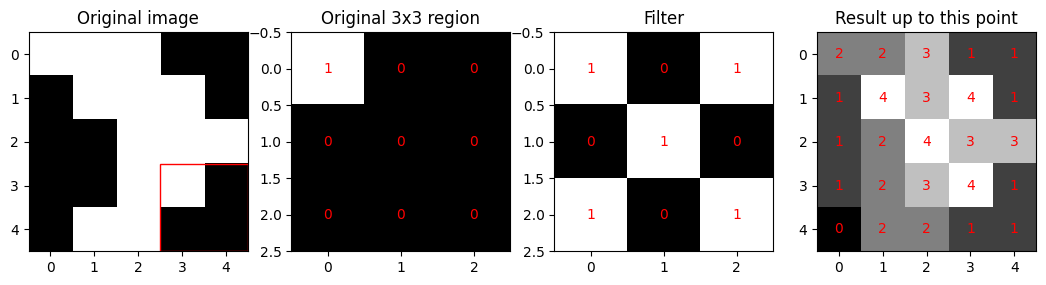

In [157]:
from utils import plot_convolution

results = plot_convolution(image, filt) 

##### Max-Pooling layers
![](https://morvanzhou.github.io/static/results/ML-intro/cnn5.png)

Early papers on CNNs found that at each convolution, the neural layer would inadvertently lose some information. A popular solution is to pooling results, which also help reduce dimensionality in the follow-up layers. Let's quickly visualise this using the example from above.

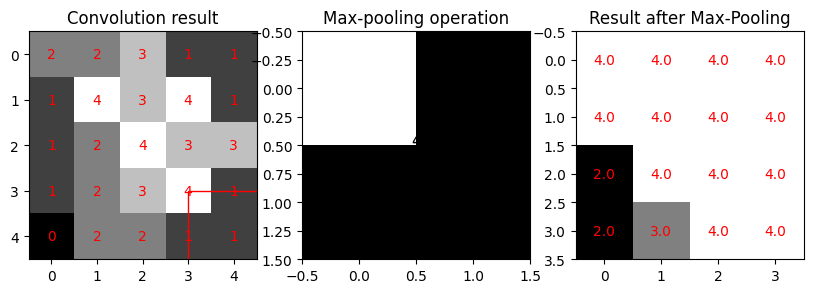

In [158]:
from utils import plot_pooling

plot_pooling(results)

##### Building a Convolutional Neural Network

We've just seen how a convolutional layer works - it applies a set of filters to different regions of the input, preserving spatial relationships between pixels. We've also seen how a max pooling layer works, reducing the dimensionality of the input while preserving the most important information (the maximum values in different regions).

A Convolutional Neural Network (CNN) typically consists of a series of convolutional layers, each followed by a non-linear activation function such as ReLU, and often followed by a pooling layer. This sequence can be repeated multiple times, creating a deep stack of layers. The idea is to use convolutional layers to extract increasingly complex features from the input image, while reducing dimensionality with pooling layers.

After this series of convolutional and pooling layers, the output is flattened into a 1D vector, and one or more fully connected layers (like in a traditional Neural Network) are used for final classification. It's important to note that these fully connected layers see the entire image at once, so they can learn to recognize combinations of features extracted by the convolutional layers, regardless of where in the image they were found.

In [159]:
class ImageCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # Convolutional layer (sees 224x224x3 image tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # Convolutional layer (sees 112x112x16 tensor after max pooling)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # Convolutional layer (sees 56x56x32 tensor after max pooling)
        self.pool = nn.MaxPool2d(2, 2) # Max pooling layer
        self.fc1 = nn.Linear(64 * 28 * 28, 500) # Linear layer (64 * 28 * 28 -> 500)
        self.fc2 = nn.Linear(500, 2) # Linear layer (500 -> 2)
        self.dropout = nn.Dropout(0.25) # Dropout layer (p=0.25) - A new addition to prevent overfitting

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28) # Flatten image input
        x = self.dropout(x) # Add dropout layer
        x = F.relu(self.fc1(x)) # Add 1st hidden layer, with relu activation function
        x = self.dropout(x) # Add dropout layer
        x = self.fc2(x) # Add 2nd hidden layer, with relu activation function
        return x

As usual, let's instantiate the model and define our loss and optimiser.

In [160]:
model = ImageCNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [161]:
# Number of epochs to train the model
n_epochs = 40

# Training loop
for epoch in range(1, n_epochs+1):
    train_loss = 0.0

    for data, target in train_dl:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_dl.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 0.693640
Epoch: 2 	Training Loss: 0.682421
Epoch: 3 	Training Loss: 0.677933
Epoch: 4 	Training Loss: 0.681780
Epoch: 5 	Training Loss: 0.677832
Epoch: 6 	Training Loss: 0.674484
Epoch: 7 	Training Loss: 0.675349
Epoch: 8 	Training Loss: 0.672322
Epoch: 9 	Training Loss: 0.663970
Epoch: 10 	Training Loss: 0.665178
Epoch: 11 	Training Loss: 0.649886
Epoch: 12 	Training Loss: 0.646417
Epoch: 13 	Training Loss: 0.636465
Epoch: 14 	Training Loss: 0.621375
Epoch: 15 	Training Loss: 0.600864
Epoch: 16 	Training Loss: 0.602733
Epoch: 17 	Training Loss: 0.600324
Epoch: 18 	Training Loss: 0.588558
Epoch: 19 	Training Loss: 0.543664
Epoch: 20 	Training Loss: 0.542480
Epoch: 21 	Training Loss: 0.559849
Epoch: 22 	Training Loss: 0.505272
Epoch: 23 	Training Loss: 0.499375
Epoch: 24 	Training Loss: 0.513618
Epoch: 25 	Training Loss: 0.488559
Epoch: 26 	Training Loss: 0.479023
Epoch: 27 	Training Loss: 0.434879
Epoch: 28 	Training Loss: 0.495909
Epoch: 29 	Training Loss: 0.3

Let's compare results to the previous MLP!

In [163]:
# Test the network
correct = 0
total = 0
misclassified_images = []
misclassified_labels = []
correct_images = []
correct_labels = []
predicted_labels = []

with torch.no_grad():
    for data in test_dl:
        images, labels = data
        outputs = model(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Check for misclassifications
        for image, label, prediction in zip(images, labels, predicted):
            if label != prediction:
                misclassified_images.append(image)
                misclassified_labels.append(label.item())
                predicted_labels.append(prediction.item())
            else:
                correct_images.append(image)
                correct_labels.append(label.item())

print('Accuracy of the network on test images: %d %%' % (100 * correct / total))

Accuracy of the network on test images: 75 %


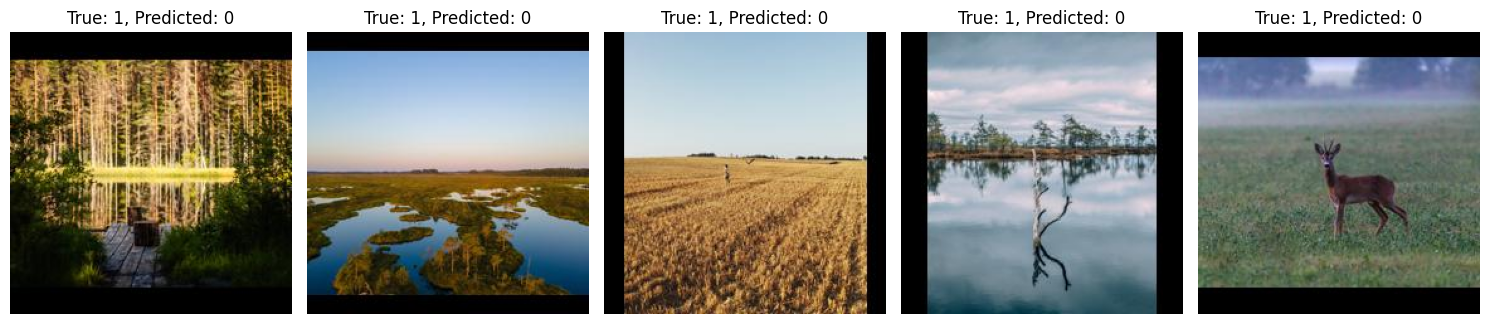

In [164]:
# Convert lists to tensors for easier manipulation
misclassified_images = torch.stack(misclassified_images)
misclassified_labels = torch.tensor(misclassified_labels)
predicted_labels = torch.tensor(predicted_labels)
fig = plt.figure(figsize=(15, 15))
for i in range(len(misclassified_images)):
    ax = fig.add_subplot(4, 5, i+1)  # Assuming a maximum of 20 misclassifications
    img = misclassified_images[i].permute(1, 2, 0).numpy()  # convert to numpy and rearrange dimensions
    ax.imshow(img)
    ax.set_title(f"True: {misclassified_labels[i]}, Predicted: {predicted_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

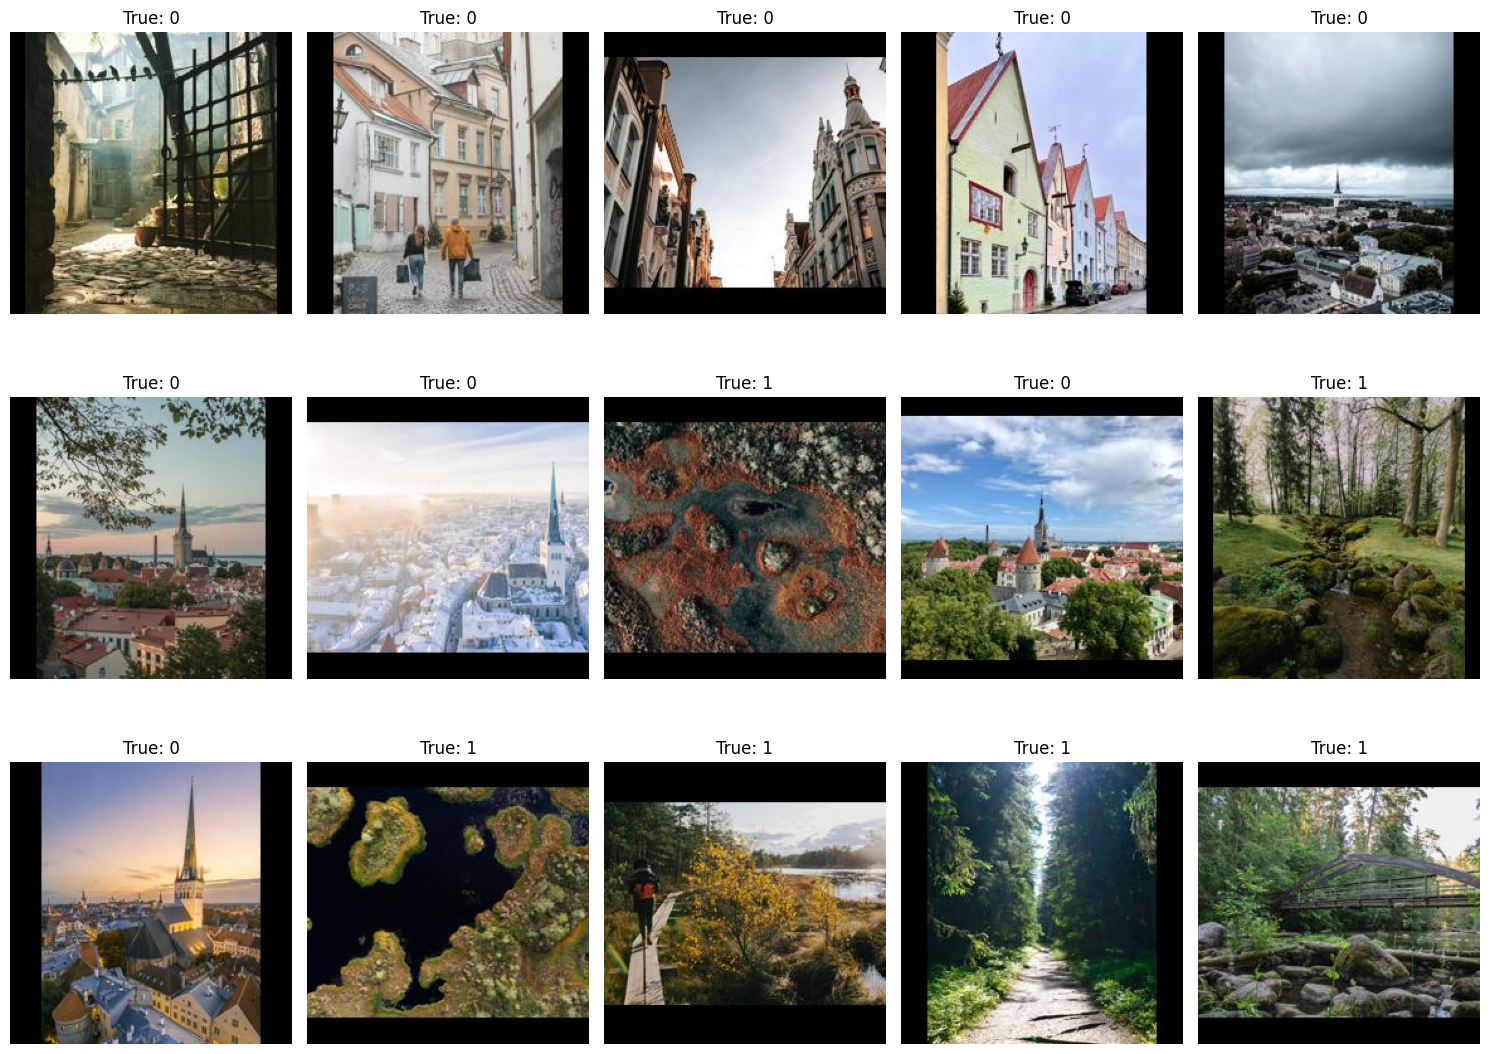

In [165]:
fig = plt.figure(figsize=(15, 15))
for i in range(len(correct_images)):
    ax = fig.add_subplot(4, 5, i+1)  # Assuming a maximum of 20 misclassifications
    img = correct_images[i].permute(1, 2, 0).numpy()  # convert to numpy and rearrange dimensions
    ax.imshow(img)
    ax.set_title(f"True: {correct_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Our CNN has demonstrated a remarkable improvement over the previous standard neural network model. By incorporating convolutional and pooling layers, the model is now effectively using the spatial information in the images. This is reflected in the improved accuracy of our model on the test images. It's important to note, however, that our dataset is quite small, with only 100 images. While this is enough for us to see the benefits of using a CNN for image classification, in real-world applications we'd likely need thousands (if not millions) of images to achieve high accuracy.

Nonetheless, our results are promising. With more images, and potentially more complex and deeper architectures (more layers), we could further improve the accuracy. Also, techniques such as image augmentation (random rotations, scaling, flips, etc.), batch normalization, and different optimization algorithms could also help. This exercise has provided a good foundation to build upon. Deep Learning and CNNs are vast topics with many advanced techniques and models to explore, such as transfer learning and architectures like ResNet, Inception, and more. The sky is the limit!

#### Recurrent Neural Networks ⭮

Recurrent Neural Networks (RNNs) are a type of neural network designed to handle sequential data. Sequential data, or time-series data, is any kind of data where the order matters. This can include sentences (where the order of words is important), stock prices, weather data, etc.

Traditional neural networks aren't well suited to these tasks because they process each input independently. If you feed in a sentence one word at a time, a standard neural network will treat each word as a separate entity and won't remember its context in the sentence.

RNNs, on the other hand, have loops that allow information to be passed from one step in the sequence to the next. This gives them a kind of memory about what they have processed so far.

![](https://i.stack.imgur.com/WSOie.png)



Despite their advantages, RNNs have their problems. They can be difficult to train effectively due to issues such as vanishing gradients, where the weights in the earlier layers of the network are updated very little during training, making the network difficult to train. More advanced variants of RNNs, such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks, have mechanisms to combat these problems and are commonly used in practice.

Let's look at an example of how an RNN can be used for our previous task of predicting the origin of surnames. Note that we stick to simple layers here, but PyTorch has [implementations](https://pytorch.org/docs/stable/nn.html#recurrent-layers) for most relevant recurrent layers out there.

In [166]:
class SurnameRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Convert character to dense vector - turn our character indices into dense vectors of fixed size
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers, batch_first=True)  # RNN layer
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected layer for final output
        
    def forward(self, surname):
        embedded = self.embedding(surname)  # First pass characters through embedding layer
        output, hidden = self.rnn(embedded)  # Pass embeddings through RNN
        final_output = self.fc(hidden.squeeze(0))  # Pass final hidden state through fully connected layer
        
        return final_output

In [167]:
le = LabelEncoder()
labels = le.fit_transform(surnames['country'])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(surnames['surnames'], labels, test_size=0.2, random_state=42)

In [168]:
# Converting surnames into ASCII values
X_train = [torch.tensor([ord(c) for c in name], dtype=torch.long) for name in X_train]
X_test = [torch.tensor([ord(c) for c in name], dtype=torch.long) for name in X_test]

In [169]:
X_train

[tensor([ 68, 109, 121, 116, 114, 101, 110, 107, 111]),
 tensor([ 76, 101, 112, 112]),
 tensor([ 80, 101, 116, 114, 101, 110, 107, 111]),
 tensor([ 76, 101, 118,  99, 104, 101, 110, 107, 111]),
 tensor([ 77, 105, 108, 108, 101, 114]),
 tensor([ 82, 105, 116, 116, 101, 114]),
 tensor([ 66, 111, 110, 100,  97, 114]),
 tensor([ 86,  97, 115, 121, 108, 101, 110, 107, 111]),
 tensor([ 83,  99, 104, 109, 105, 116, 116]),
 tensor([ 72, 101, 114, 114, 109,  97, 110, 110]),
 tensor([ 66, 111, 114, 121, 115, 101, 110, 107, 111]),
 tensor([ 68, 105,  97,  99, 104, 101, 110, 107, 111]),
 tensor([ 76, 105, 105, 118]),
 tensor([ 75, 111, 114, 110, 121, 101, 110, 107, 111]),
 tensor([ 90,  97, 101, 116, 115]),
 tensor([ 70, 114, 105, 116, 122]),
 tensor([ 75, 114,  97, 102, 116]),
 tensor([ 75, 108, 101, 105, 110]),
 tensor([ 82,  97, 117, 100]),
 tensor([ 75,  97, 117, 102, 109,  97, 110, 110]),
 tensor([ 74, 228, 103, 101, 114]),
 tensor([ 83,  97, 118,  99, 104, 101, 110, 107, 111]),
 tensor([ 66,

When we prepare sequences of data for a recurrent neural network (RNN), every sequence within a single batch needs to be of the same length so it can be properly processed by the model in parallel. However, when dealing with real-world sequence data like text or time series, our sequences can often vary in length.

For example, in the case of the surnames, different names can have different numbers of characters. To handle this, we can pad the shorter sequences with some special padding symbol (like a zero vector) to make all sequences within a batch the same length.

In [170]:
from torch.nn.utils.rnn import pad_sequence

# Padding sequences and creating DataLoader
def collate_fn(batch):
    surnames, labels = zip(*batch)
    surnames_pad = pad_sequence(surnames, batch_first=True)
    return surnames_pad, torch.tensor(labels, dtype=torch.long)

In [171]:
# Create DataLoader
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

train_dl = DataLoader(train_data, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_dl = DataLoader(test_data, batch_size=16, shuffle=False, collate_fn=collate_fn)


In [172]:
# Hyperparameters
input_dim = 255  # ASCII range
embedding_dim = 64  
hidden_dim = 128  
output_dim = len(le.classes_) 
n_layers = 1

A neat trick we will introduce now addresses the issue of class imbalance by passing weights to the loss function proportional to the class share in the training data.

In [173]:
weights = torch.tensor((1 / np.bincount(labels)) * 100, dtype=torch.float)
weights

tensor([0.9709, 0.5000, 0.5000])

In [174]:
# Initialize the model, optimizer and loss function
model = SurnameRNN(input_dim, embedding_dim, hidden_dim, output_dim, n_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(weights)

In [175]:
for epoch in range(20):  # example number of epochs
    for i, (surnamesb, labels) in enumerate(train_dl):
        output = model(surnamesb)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1, Loss: 0.7489140033721924
Epoch: 2, Loss: 0.6618591547012329
Epoch: 3, Loss: 0.8458707332611084
Epoch: 4, Loss: 0.8193778395652771
Epoch: 5, Loss: 0.5613164901733398
Epoch: 6, Loss: 0.3162083625793457
Epoch: 7, Loss: 0.2967257499694824
Epoch: 8, Loss: 0.1485372632741928
Epoch: 9, Loss: 0.09391075372695923
Epoch: 10, Loss: 0.07552407681941986
Epoch: 11, Loss: 0.07085148990154266
Epoch: 12, Loss: 0.0542471744120121
Epoch: 13, Loss: 0.07695995271205902
Epoch: 14, Loss: 0.0930403470993042
Epoch: 15, Loss: 0.04734346270561218
Epoch: 16, Loss: 0.15517187118530273
Epoch: 17, Loss: 0.03162185847759247
Epoch: 18, Loss: 0.03871065005660057
Epoch: 19, Loss: 0.0403427816927433
Epoch: 20, Loss: 0.02929084561765194


After training the model, we evaluate its performance on the test set.

In [176]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    all_predicted = []

    for surnamesb, labels in test_dl:
        outputs = model(surnamesb)
        
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        total += labels.size(0)
        
        # Total correct predictions
        correct += (predicted == labels).sum().item()
        
        all_predicted += predicted.tolist()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 79.20792079207921%


Finally, we create a confusion matrix to visualise how well our model performed for each nationality.

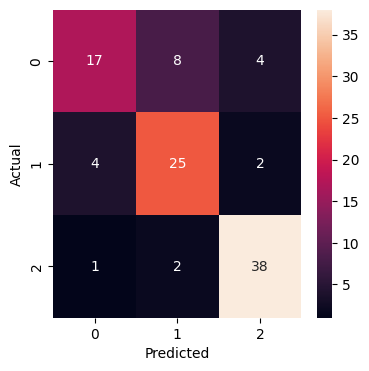

In [177]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, all_predicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Our gains in performance using a Recurrent Neural Network (RNN) are modest, if at all, over using a simpler model based on bicharacters and a Multilayer Perceptron (MLP). However, it's important to note that RNNs tend to shine in more complex tasks that involve longer sequences and where the order of elements carries significant information. For instance, in natural language processing tasks like text generation, machine translation, or sentiment analysis of sentences, RNNs typically outperform simpler models because they are able to capture the sequential nature of language and the contextual dependencies between words. Thus, the choice of model often depends on the specific task at hand, its complexity, and the characteristics of the data.

In this notebook we won't cover topics like sequence-to-sequence models (Seq2Seq) and Attention Mechanisms, which are important constructs in more advanced models for tasks such as machine translation, text summarization, and even in modern transformer models like GPT and BERT. If you're interested in learning more about these topics, we highly recommend checking out the following resources:
- [PyTorch's Tutorial on Seq2Seq translation](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)
- [Benjamin Warner's annotated implementation of the three main flavours of Attention](https://benjaminwarner.dev/2023/07/01/attention-mechanism)

Remember that understanding these more complex models often requires a solid foundation in the basics, so take the time to fully understand RNNs before diving into these advanced topics. Happy learning!

#### A quick dive on Transformers 🤖 using Hugging Face 🤗

After our journey through the main architectures in Deep Learning, it's worth mentioning one of the most significant advancements in the field of Natural Language Processing: The Transformer model. This model, introduced in the paper "Attention is All You Need" by Vaswani et al., has formed the basis for state-of-the-art models like BERT, GPT, and others.

Transformers tackle some of the limitations of RNNs, including long training times and difficulty handling long-range dependencies in the text. They introduced the concept of "attention" that allows the model to focus on different parts of the input sequence when producing the output, enabling it to be more context-aware.

In the context of deep learning tools, Hugging Face's transformers library stands out as one of the most powerful and popular choices for working with Transformer models. It provides thousands of pre-trained models that can be used out of the box for tasks like text classification, text generation, translation, summarization, and more. The library is also designed to be highly interoperable with PyTorch and TensorFlow, making it a versatile tool for both research and production.

A transformer model can be fully implemented in ten or less lines of code for a text classification task:

In [178]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)

loss = outputs.loss
logits = outputs.logits

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In just a few lines of code, we've loaded a pre-trained BERT model and used it to make predictions on a piece of text, even if the task was irrelevant. The transformers library handles all the necessary preprocessing, tokenization, and model inference steps under the hood, allowing us to focus on developing our application.

As an illustrative example of a transfer learning task, let's fully spell out a pipeline that combines what we've learnt to predict main concept labels for articles published by faculty members of TalTech.

In [179]:
# Fetch Open Access articles from TalTech
articles = getter.get_oa_articles(institution='TT').explode(column="concepts")[["abstract", "concepts"]].dropna().reset_index(drop=True)

# Expand the 'concepts' column and concatenate it back to the dataframe, keeping only 'abstract' and 'display_name'
articles = pd.concat([articles.drop(["concepts"], axis=1), pd.json_normalize(articles["concepts"])], axis=1)[["abstract", "display_name"]]

# Keep articles with display_name in the top 5 most frequent
articles = articles[articles["display_name"].isin(articles["display_name"].value_counts().head(5).index)].sample(1500)

Note that in this case, we are dealing with a multi-label classification problem. This is because each of our articles can have more than one 'concept' associated with it, and our model needs to predict all relevant 'concepts' given an 'abstract'.

In [180]:
articles.head(10)

abstract      display_name
181306  The Gulf of Riga is a relatively shallow bay c...           Biology
71044   The concept of adaptation has a considerable i...  Computer science
51738   Power consumption of synchronous sequential ci...           Physics
29467   This paper describes a preliminary prototype o...       Engineering
139633  The aim of this study was to evaluate individu...           Physics
105520  This article addresses the problem of checking...  Computer science
163729  The particular problems waste collection in lo...       Engineering
104819  Nowadays, many buildings are equipped with var...       Mathematics
141620  This paper discusses the essence and applicati...  Computer science
172279  Smart Mobility is one of the main directions o...  Computer science

In [181]:
from torch.utils.data import Dataset
from transformers import BertTokenizerFast

# Initialize the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

We will create a dictionary where keys are abstracts and values are lists of associated concepts. Let's also create a custom Dataset object, that allows us to override some of the method functions and adjust them to our multi-label case using transformers.

In [182]:
class AbstractConceptDataset(Dataset):
    def __init__(self, abstracts, labels, tokenizer, max_length):
        self.abstracts = abstracts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.abstracts)
    
    def __getitem__(self, idx):
        abstract = self.abstracts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            abstract,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        return {
            'abstract': abstract,
            'input_ids': torch.tensor(encoding['input_ids'], dtype=torch.long).flatten(),  # convert the list to a tensor
            'attention_mask': torch.tensor(encoding['attention_mask'], dtype=torch.long).flatten(),  # convert the list to a tensor
            'labels': torch.tensor(label, dtype=torch.float),
        }


Let's create a dictionary where keys are abstracts and values are lists of associated concepts


In [183]:
from sklearn.preprocessing import MultiLabelBinarizer

abstract_to_concept = articles.groupby('abstract')['display_name'].apply(list).to_dict()

# Convert labels to binary vectors
mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(list(abstract_to_concept.values()))

In [184]:
# Split the data into training and validation sets
abstracts_train, abstracts_val, labels_train, labels_val = train_test_split(
    list(abstract_to_concept.keys()), 
    encoded_labels, 
    test_size=0.2, 
    random_state=42
)

In [185]:
print(abstracts_train[:2], "\n\n", labels_train[:2])

['Mild cognitive impairment (MCI) is an early stage of cognitive abilities loss and puts older adults at higher risk of developing dementia. Virtual reality (VR) could represent a tool for the early assessment of this pathological condition and for administering cognitive training. This work presents a study evaluating the acceptance and the user experience of an immersive VR application representing a supermarket. As the same application had already been assessed in Italy, we aimed to perform the same study in Estonia in order to compare the outcomes in the two populations. Fifteen older adults with MCI were enrolled in one Rehabilitation Center of Estonia and tried the supermarket once. Afterwards, they were administered questionnaires aimed at evaluating their technology acceptance, sense of presence, and cybersickness. Estonian participants reported low side effects and discrete enjoyment, and a sense of presence. Nonetheless, their intention to use the technology decreased after t

We can now create our datasets and dataloaders. Note that this is not strictly necessary, but simpler approaches require using modules from Hugging Face. You can see an example in [this tutorial](https://www.philschmid.de/getting-started-pytorch-2-0-transformers).

In [186]:
train_dataset = AbstractConceptDataset(abstracts_train, labels_train, tokenizer, max_length=512)
val_dataset = AbstractConceptDataset(abstracts_val, labels_val, tokenizer, max_length=512)

train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=64)

Let's define the model. Note that we could in practice build it in a single line using existing modules:

However, let's explicitly define it, and freeze the BERT layer parameters (as otherwise these will take forever to train!)

In [187]:
from transformers import BertModel

class BERTMultiLabelClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels):
        super(BERTMultiLabelClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        
        # Freeze BERT weights
        for param in self.bert.parameters():
            param.requires_grad = False
            
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state_cls = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(last_hidden_state_cls)
        
        return logits

In [188]:
from torch.nn import BCEWithLogitsLoss

# Initialize the model
model = BERTMultiLabelClassifier('bert-base-uncased', len(mlb.classes_))
model.to(device)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Define the loss function
criterion = BCEWithLogitsLoss()

And let's train away! We're in fact only training the top classifier layer, so this should be fast. In practice, you can use a few Linear layers with activation functions if you think the model can benefit from the non-linearities, and even fine-tune some of the layers of the transformer if there's a reason to do so and you have the GPU to do it.

In [190]:
for epoch in range(3):
    model.train()
    total_loss = 0

    for i, data in enumerate(train_dl):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)
        
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        logits = model(input_ids, attention_mask)
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch+1} | Loss: {total_loss/len(train_dl)}')

Great🎉! 

In this tutorial, we've:

1. Learned about the building blocks of PyTorch, from layer creation to regularisation and model training;
2. Trained a feed-forward neural networks on traditional and computer vision tasks;
3. Explored how more advanced network structures can be leveraged to perform time series analysis, and how convolutional layers impact the performance of neural networks on computer vision tasks, and;
4. Loaded pre-trained language models from huggingface and use transfer learning to showcase NLP applications.

Hopefully this tutorial has given you a solid foundation in different aspects of deep learning that you can apply to your project work this week. In the meantime, happy training 🏋️!